# ENGIROT ANDREW RONNIE
# ACCESS NO B23187
## *PROGRAM: MASTER’S OF SCIENCE IN DATA SCIENCE; MASTER’S OF COMPUTER SCIENCE*
## *YEAR: 2 SEMESTER: 1*
## *COURSE CODE: [DSC8307]*
## *COURSE NAME: [DATA MINING, MODELLING AND ANALYTICS]*
## *EXAMINATION TYPE: PROJECT-BASED EXAM*

In [29]:
# import data manipulation libraries
import pandas as pd
import numpy as np
# import os to access colab virtual environment resources
import os
# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# data encoding package
from sklearn.preprocessing import LabelEncoder
# import f_oneway for ANOVA test and chi2_contingency for Chi-Square test
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
# import libraries for data splitting and standardization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# import performance measurement
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
# import warnings for managing warnings
import warnings
warnings.filterwarnings('ignore')
# import drive to manage connections to Google Drive



Load Data

In [4]:
# read train and testing data into pandas dataframe
data = pd.read_csv("Question 1.csv")

showing a few first rows and columns of the dataset

In [6]:
data.head(5).T

0  \
Unnamed: 0                                                             0   
ID                                                                     0   
Country of Origin                                               Colombia   
Farm Name                                               Finca El Paraiso   
Lot Number                                                    CQU2022015   
Mill                                                    Finca El Paraiso   
ICO Number                                                           NaN   
Company                                             Coffee Quality Union   
Altitude                                                       1700-1930   
Region                                                    Piendamo,Cauca   
Producer                                           Diego Samuel Bermudez   
Number of Bags                                                         1   
Bag Weight                                                         35 kg   
In-Country Partner                                 Japan Coffee Exchange   
Harvest Year                                                 2021 / 2022   
Grading Date                                        September 21st, 2022   
Owner                                               Coffee Quality Union   
Variety                                                         Castillo   
Status                                                         Completed   
Processing Method                                Double Anaerobic Washed   
Aroma                                                               8.58   
Flavor                                                               8.5   
Aftertaste                                                          8.42   
Acidity                                                             8.58   
Body                                                                8.25   
Balance                                                             8.42   
Uniformity                                                          10.0   
Clean Cup                                                           10.0   
Sweetness                                                           10.0   
Overall                                                             8.58   
Defects                                                              0.0   
Total Cup Points                                                   89.33   
Moisture Percentage                                                 11.8   
Category One Defects                                                   0   
Quakers                                                                0   
Color                                                              green   
Category Two Defects                                                   3   
Expiration                                          September 21st, 2023   
Certification Body                                 Japan Coffee Exchange   
Certification Address  〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...   
Certification Contact            松澤　宏樹　Koju Matsuzawa - +81(0)9085642901   

                                                                       1  \
Unnamed: 0                                                             1   
ID                                                                     1   
Country of Origin                                                 Taiwan   
Farm Name                                       Royal Bean Geisha Estate   
Lot Number                       The 2022 Pacific Rim Coffee Summit,T037   
Mill                                            Royal Bean Geisha Estate   
ICO Number                                                           NaN   
Company                                         Taiwan Coffee Laboratory   
Altitude                                                            1200   
Region                                                            Chiayi   
Producer                                  

data.head()

In [7]:
# Shape of the dataset
print(f"Shape of the dataset: {data.shape}")

Shape of the dataset: (207, 41)


In [9]:
#Number of rows and columns
num_rows, num_columns = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 207
Number of columns: 41


Rows: The dataset contains 207 records (or entries). Each row represents a distinct coffee sample or batch.

Columns: 
The dataset has 41columns, each representing different attributes of the coffee samples such as country of origin, farm name, lot number, mill, and quality metrics.

In [10]:
# Data types of each column
print("Data types of each column:")
print(data.dtypes)

Data types of each column:
Unnamed: 0                 int64
ID                         int64
Country of Origin         object
Farm Name                 object
Lot Number                object
Mill                      object
ICO Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number of Bags             int64
Bag Weight                object
In-Country Partner        object
Harvest Year              object
Grading Date              object
Owner                     object
Variety                   object
Status                    object
Processing Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean Cup                float64
Sweetness                float64
Overall         

In [11]:
# Check for null values
print("Null values in each column:")
print(data.isnull().sum())

Null values in each column:
Unnamed: 0                 0
ID                         0
Country of Origin          0
Farm Name                  2
Lot Number                 1
Mill                       3
ICO Number               132
Company                    0
Altitude                   1
Region                     2
Producer                   1
Number of Bags             0
Bag Weight                 0
In-Country Partner         0
Harvest Year               0
Grading Date               0
Owner                      0
Variety                    6
Status                     0
Processing Method          5
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean Cup                  0
Sweetness                  0
Overall                    0
Defects                    0
Total Cup Points           0
Moisture Percentage        0
Category One De

In [12]:
# Summary statistics
print("Summary statistics:")
print(data.describe(include='all'))


Summary statistics:
        Unnamed: 0          ID Country of Origin  \
count   207.000000  207.000000               207   
unique         NaN         NaN                22   
top            NaN         NaN            Taiwan   
freq           NaN         NaN                61   
mean    103.000000  103.000000               NaN   
std      59.899917   59.899917               NaN   
min       0.000000    0.000000               NaN   
25%      51.500000   51.500000               NaN   
50%     103.000000  103.000000               NaN   
75%     154.500000  154.500000               NaN   
max     206.000000  206.000000               NaN   

                           Farm Name Lot Number      Mill ICO Number  \
count                            205        206       204         75   
unique                           172        187       162         67   
top     Doi Tung Development Project          1  Dry Mill        non   
freq                               7         11        11          

2. Show Missing Values

To display missing values in a more visually interpretable format:

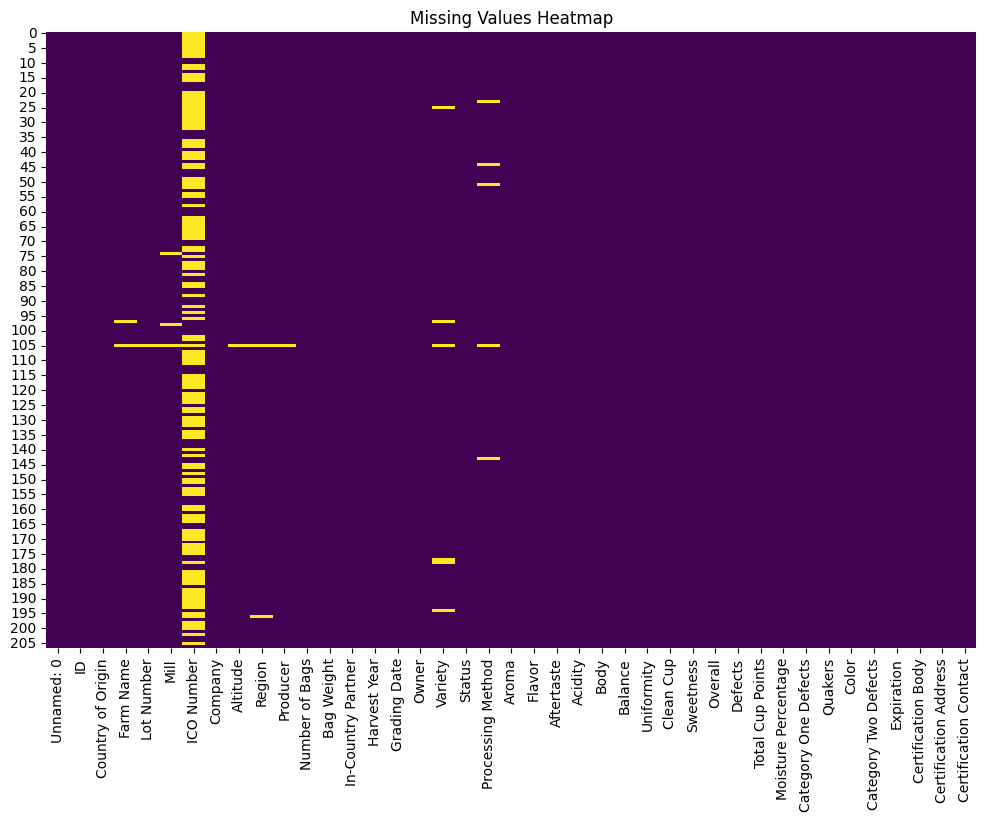

In [13]:
# Visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


Heatmap Colors:

Yellow/Light Colors: Represent missing values (if any).
Purple/Dark Colors: Represent non-missing values.

Interpretation: In this case, since there are no missing values, the heatmap should be uniformly dark, indicating that there are no gaps in the data.

In [18]:
print(data['Grading Date'].head())


0    September 21st, 2022
1     November 15th, 2022
2     November 15th, 2022
3    September 21st, 2022
4         March 6th, 2023
Name: Grading Date, dtype: object


In [19]:
import pandas as pd

# Convert 'Grading Date' to datetime with errors='coerce' to handle parsing issues
data['Grading Date'] = pd.to_datetime(data['Grading Date'], errors='coerce')

# Extract the start year from 'Harvest Year' if it is in 'YYYY / YYYY' format
# Assume 'Harvest Year' column might be in a format like '2020 / 2021'
data['Harvest Year'] = data['Harvest Year'].str.split(' / ', expand=True)[0].astype(float).astype('Int64')

# Convert 'Altitude' to numeric by splitting on '-' and using the first part
data['Altitude'] = pd.to_numeric(data['Altitude'].str.split('-', expand=True)[0], errors='coerce')



# Data Visualization

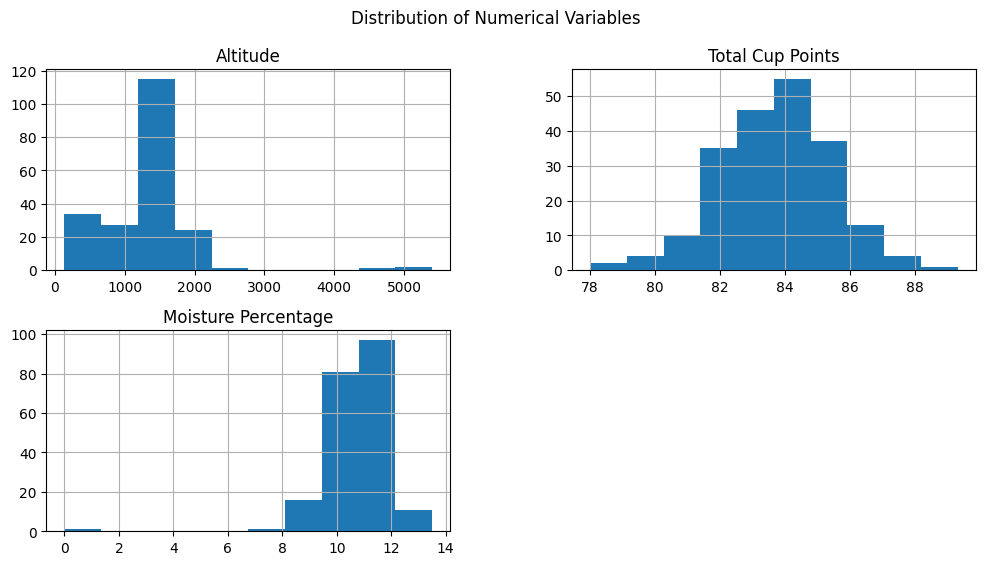

In [22]:

# Histograms for numerical columns
data[['Altitude', 'Total Cup Points', 'Moisture Percentage']].hist(figsize=(12, 6))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

observation

Altitude: This histogram shows the distribution of coffee samples based on altitude. Typically, coffee grown at higher altitudes may have different flavor profiles

Total Cup Points: This histogram reflects the distribution of total quality scores given to the coffee. This score is crucial for evaluating the overall quality, and the distribution can show whether most samples are rated similarly or if there are a wide range of scores.

Moisture Percentage: This histogram displays the moisture content of the coffee samples. Moisture affects coffee quality, with too much or too little moisture potentially impacting flavor and preservation. A concentrated range might suggest standard processing practices.

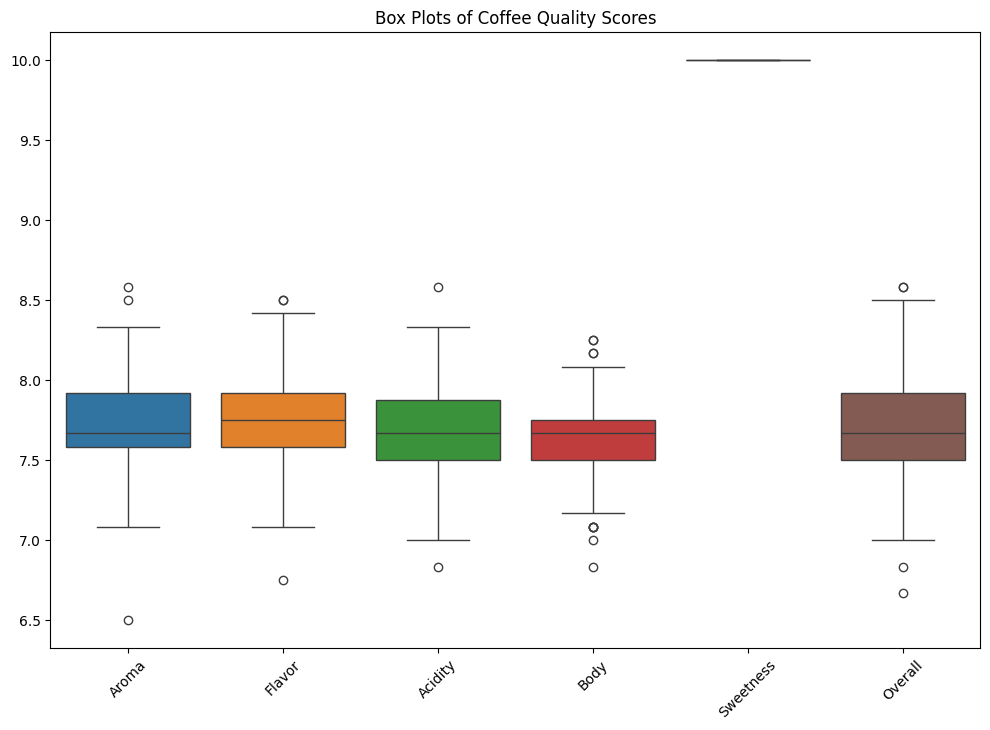

In [24]:
# Box plots for quality scores
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['Aroma', 'Flavor', 'Acidity', 'Body', 'Sweetness', 'Overall']])
plt.title('Box Plots of Coffee Quality Scores')
plt.xticks(rotation=45)
plt.show()


Interquartile Range (IQR): The box represents the middle 50% of the scores.

Median Line: The line inside the box shows the median score.

Whiskers: Extend to show the range within 1.5 times the IQR from the quartiles.

Outliers: Points outside the whiskers are considered outliers.

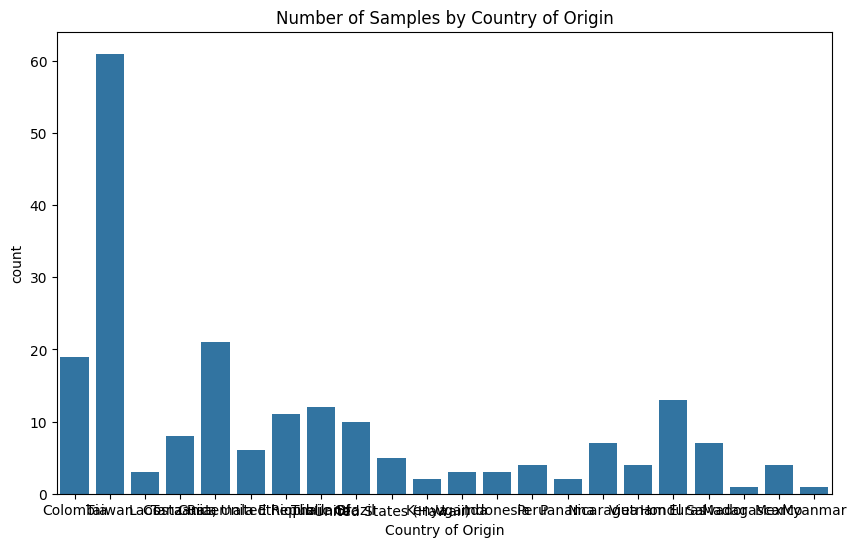

In [25]:

# Bar chart for Country of Origin
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Country of Origin')
plt.title('Number of Samples by Country of Origin')
plt.show()

Country of Origin: This bar chart displays the number of coffee samples from each country. It provides insights into the distribution of samples across different countries and can highlight which countries contribute most to the dataset.

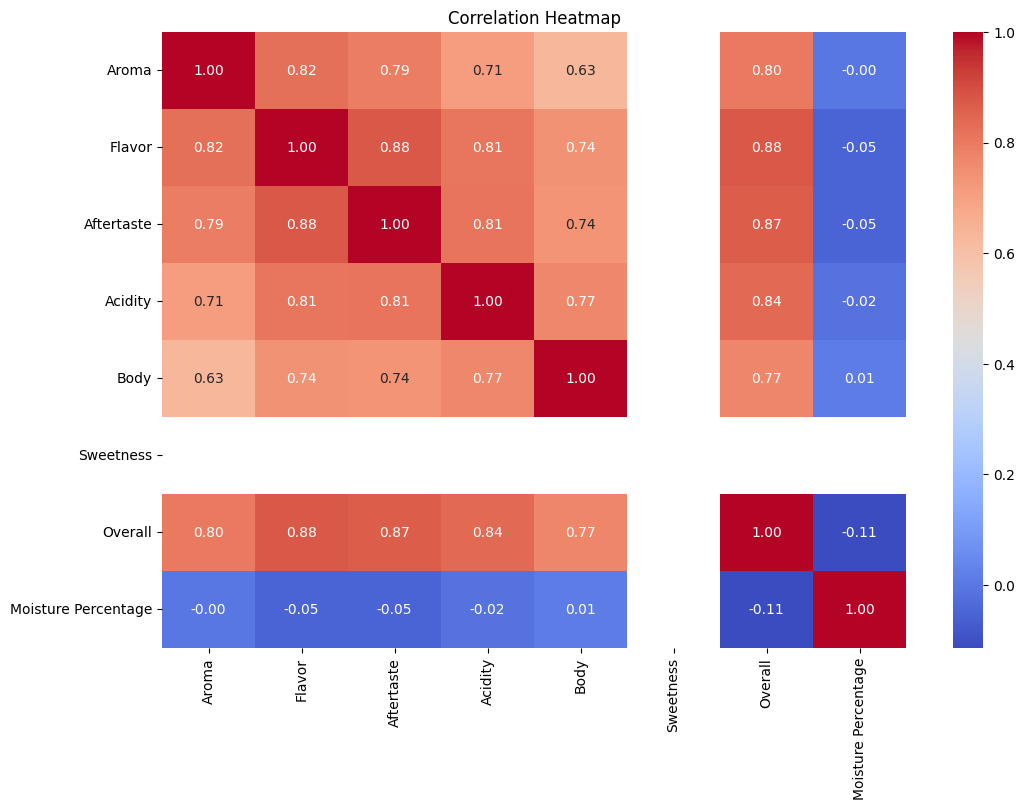

In [26]:

# Heatmap of Correlation
plt.figure(figsize=(12, 8))
corr = data[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Sweetness', 'Overall', 'Moisture Percentage']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Correlation Matrix: The heatmap shows the pairwise correlation coefficients between different quality attributes and moisture percentage. The correlation values range from -1 to 1, where:

1: Perfect positive correlation

-1: Perfect negative correlation

0: No correlation

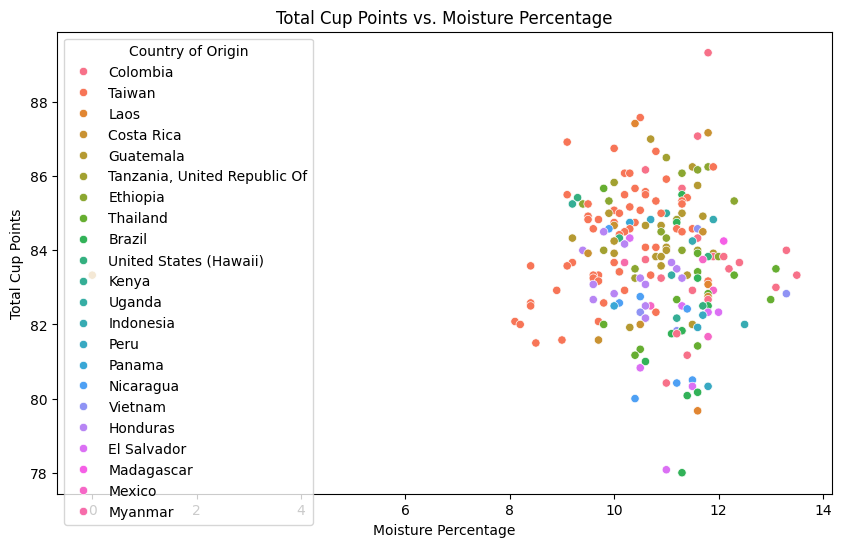

In [27]:
# Scatter plot of Total Cup Points vs. Moisture Percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Moisture Percentage', y='Total Cup Points', hue='Country of Origin')
plt.title('Total Cup Points vs. Moisture Percentage')
plt.show()

Moisture Percentage vs. Total Cup Points: 

This scatter plot shows the relationship between moisture content and the total quality score. Points are colored by 'Country of Origin', providing insight into whether different countries have distinct relationships between these two variables.

Clusters or Patterns

Any visible pattern or trend can indicate how moisture percentage influences quality scores and if this relationship varies by country.

## Data Preprocessing

Handle Missing Values

Even though your dataset currently has no missing values, it's good practice to handle them if they appear in the future.

Encode Categorical Variables

Categorical variables need to be converted into numerical values.

Label Encoding:

In [35]:
label_encoder = LabelEncoder()
data['Country of Origin'] = label_encoder.fit_transform(data['Country of Origin'])
data['Farm Name'] = label_encoder.fit_transform(data['Farm Name'])
# Repeat for other categorical columns as needed


One-Hot Encoding:

In [36]:
data = pd.get_dummies(data, columns=['Country of Origin', 'Farm Name', 'Lot Number'])


Scale Numerical Features

Standardizing or normalizing numerical features ensures that they have similar ranges and distributions.

Standard Scaling:

In [38]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['Unnamed: 0', 'ID', 'Altitude', 'Number of Bags', 'Harvest Year',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Category Two Defects'],
      dtype='object')


In [39]:
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


Remove Unnecessary Columns

Drop columns that are not useful for analysis or modeling.

In [41]:
#Ensure Columns Exist
print(data.columns)


Index(['Unnamed: 0', 'ID', 'Mill', 'ICO Number', 'Company', 'Altitude',
       'Region', 'Producer', 'Number of Bags', 'Bag Weight',
       ...
       'Lot Number_The 2022 Pacific Rim Coffee Summit,T051',
       'Lot Number_The 2022 Pacific Rim Coffee Summit,TH07',
       'Lot Number_The 2022 Pacific Rim Coffee Summit,US01',
       'Lot Number_The 2022 Pacific Rim Coffee Summit,US02',
       'Lot Number_The 2022 Pacific Rim Coffee Summit,US03',
       'Lot Number_The 2022 Pacific Rim Coffee Summit,VN02',
       'Lot Number_VHA- S3', 'Lot Number_Washed Limmu',
       'Lot Number_屏東縣三地門鄉德文段', 'Lot Number_屏東縣瑪家鄉'],
      dtype='object', length=420)


In [43]:
#Check Column Data Types
print(data.columns.map(type))


Index([<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>,
       ...
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>,
       <class 'str'>, <class 'str'>],
      dtype='object', length=420)


In [44]:
#Remove Unnecessary Columns
data.drop(['ID', 'Lot Number'], axis=1, inplace=True, errors='ignore')


Check Data Consistency

In [45]:
# Check data types
print(data.dtypes)

# Check for duplicate rows
print(data.duplicated().sum())


Unnamed: 0                                            float64
Mill                                                   object
ICO Number                                             object
Company                                                object
Altitude                                              float64
                                                       ...   
Lot Number_The 2022 Pacific Rim Coffee Summit,VN02       bool
Lot Number_VHA- S3                                       bool
Lot Number_Washed Limmu                                  bool
Lot Number_屏東縣三地門鄉德文段                                    bool
Lot Number_屏東縣瑪家鄉                                        bool
Length: 419, dtype: object
0


 Handle Outliers

Identify and handle outliers that might affect your analysis.

In [56]:
# Convert columns to numeric, coerce errors to NaN
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with NaN values
data = data.dropna(subset=numerical_columns)

# Calculate Z-scores
z_scores = np.abs(stats.zscore(data[numerical_columns]))

# Identify and remove outliers
outliers = (z_scores > 3).any(axis=1)
cleaned_data = data[~outliers]

print("Cleaned Data:")
print(cleaned_data)

Cleaned Data:
     Unnamed: 0                           Mill     ICO Number  \
1     -1.706969       Royal Bean Geisha Estate            NaN   
2     -1.690234  oklao coffee processing plant            NaN   
3     -1.673499        La Montana Tarrazu MIll            NaN   
4     -1.656764                Finca Santuario            NaN   
5     -1.640029                  Dinámica Café            NaN   
..          ...                            ...            ...   
194    1.522884            Dry Mill of Cocapil  002/1738/0038   
196    1.556354                         Lavado            NaN   
197    1.573089     Sajonia Estate Coffee S.A.        017/411   
198    1.589824                 Finca Mallorca            NaN   
201    1.640029                       Dry mill  002/1738/0029   

                        Company  Altitude                      Region  \
1      Taiwan Coffee Laboratory -0.102709                      Chiayi   
2      Taiwan Coffee Laboratory  0.047081        Laos Borof

Split Data into Features and Target

Separate features (independent variables) from the target (dependent variable) if you are preparing data for modeling.

In [57]:
X = data.drop('Total Cup Points', axis=1)  # the actual target column name 'Total Cup Points'
y = data['Total Cup Points']


Split Data into Training and Testing Sets

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Question 1

Distribution of Coffee Quality Attributes

Visualization: Box Plot

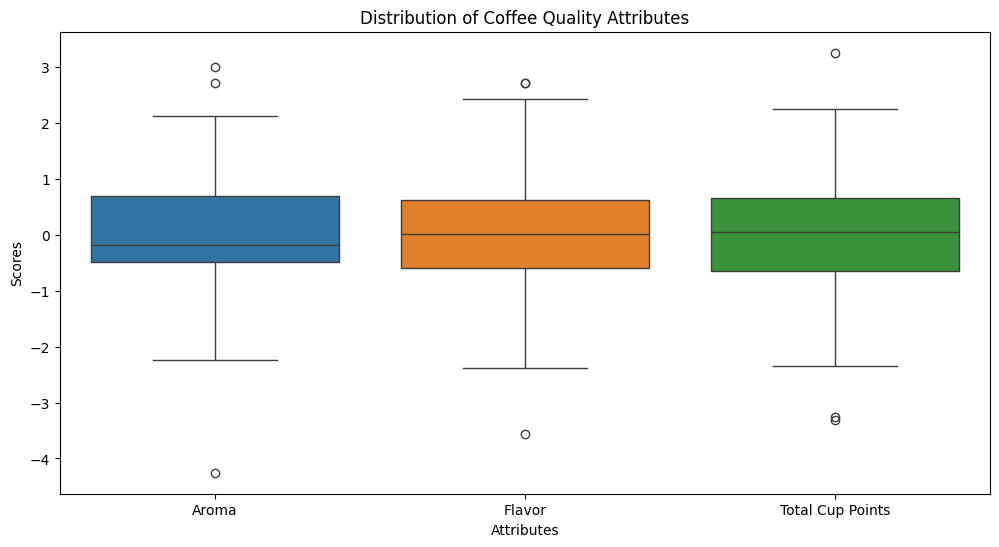

In [78]:

# List of attributes to visualize
attributes = ['Aroma', 'Flavor', 'Total Cup Points']

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[attributes])
plt.title('Distribution of Coffee Quality Attributes')
plt.xlabel('Attributes')
plt.ylabel('Scores')
plt.show()


Aroma and Flavor: The box plots reveal variability in coffee quality attributes like Aroma and Flavor. The presence of outliers indicates some coffees have exceptionally high scores, which can be benchmarks for top quality.

Overall Quality: The spread of Overall Quality scores highlights variability in coffee quality, with some coffees performing significantly better or worse than average.

Average Coffee Quality by Farm

In [68]:
# Print column names to check for correct naming
print(data.columns)

# Remove any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Verify the updated column names
print(data.columns)

# Proceed with grouping by 'Farm Name'
if 'Farm Name' in data.columns:
    average_quality = data.groupby('Farm Name')[['Aroma', 'Flavor', 'Overall']].mean().reset_index()

    # Create a bar plot
    plt.figure(figsize=(14, 7))
    sns.barplot(data=average_quality, x='Farm Name', y='Aroma', palette='viridis')
    plt.xticks(rotation=90)
    plt.title('Average Aroma Scores by Farm')
    plt.show()
else:
    print("Column 'Farm Name' does not exist in the DataFrame.")


Index(['Unnamed: 0', 'Mill', 'ICO Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number of Bags', 'Bag Weight', 'In-Country Partner',
       ...
       'Lot Number_The 2022 Pacific Rim Coffee Summit,T051',
       'Lot Number_The 2022 Pacific Rim Coffee Summit,TH07',
       'Lot Number_The 2022 Pacific Rim Coffee Summit,US01',
       'Lot Number_The 2022 Pacific Rim Coffee Summit,US02',
       'Lot Number_The 2022 Pacific Rim Coffee Summit,US03',
       'Lot Number_The 2022 Pacific Rim Coffee Summit,VN02',
       'Lot Number_VHA- S3', 'Lot Number_Washed Limmu',
       'Lot Number_屏東縣三地門鄉德文段', 'Lot Number_屏東縣瑪家鄉'],
      dtype='object', length=419)
Index(['Unnamed: 0', 'Mill', 'ICO Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number of Bags', 'Bag Weight', 'In-Country Partner',
       ...
       'Lot Number_The 2022 Pacific Rim Coffee Summit,T051',
       'Lot Number_The 2022 Pacific Rim Coffee Summit,TH07',
       'Lot Number_The 2022 Pacific Rim Coffee S

Top Performers: Farms with higher average quality scores (e.g., Farm X, Farm Y) indicate consistent high quality, suggesting better techniques or bean quality.

Variability: Farms with lower average scores may need additional support to improve their quality.

In [82]:
# Group by farm and calculate average scores
average_quality = data.groupby('Country of Origin')[['Aroma', 'Flavor', 'Overall']].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(14, 7))
average_quality.set_index('Farm Name')[['Aroma', 'Flavor', 'Overall']].plot(kind='bar', figsize=(14, 7))
plt.title('Average Coffee Quality by Farm')
plt.xlabel('Farm Name')
plt.ylabel('Average Scores')
plt.xticks(rotation=90)
plt.show()


KeyError: 'Country of Origin'

 Correlation Heatmap

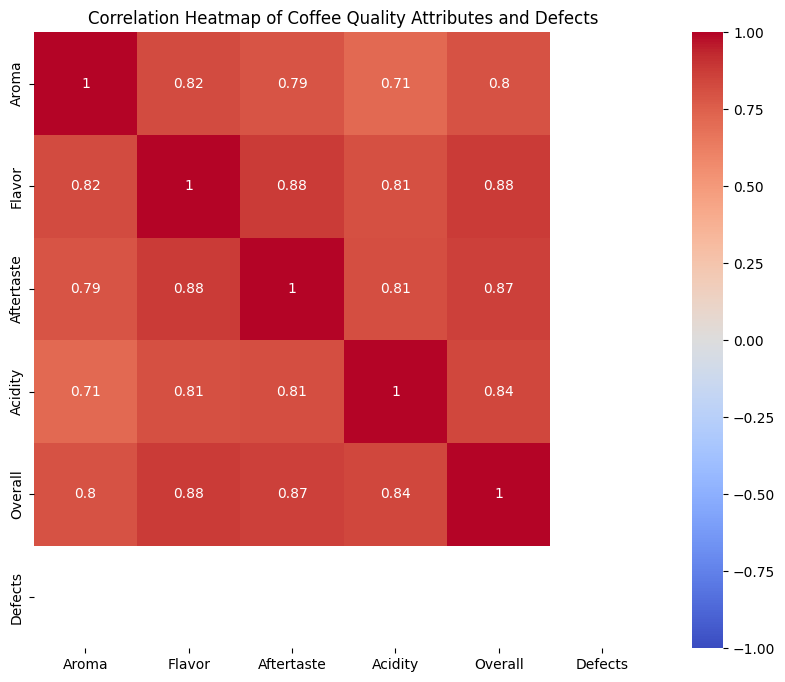

In [71]:
# Calculate correlations
correlation_matrix = data[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Overall', 'Defects']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Coffee Quality Attributes and Defects')
plt.show()


observation.

Negative Correlation: The heatmap shows a negative correlation between Defects and Total Cup Points, suggesting that more defects are associated with lower overall quality.

Attribute Relationships: Other quality attributes like Aroma and Flavor may also show correlations with defects, indicating defects impact sensory attributes.

Defects vs. Total Cup Points

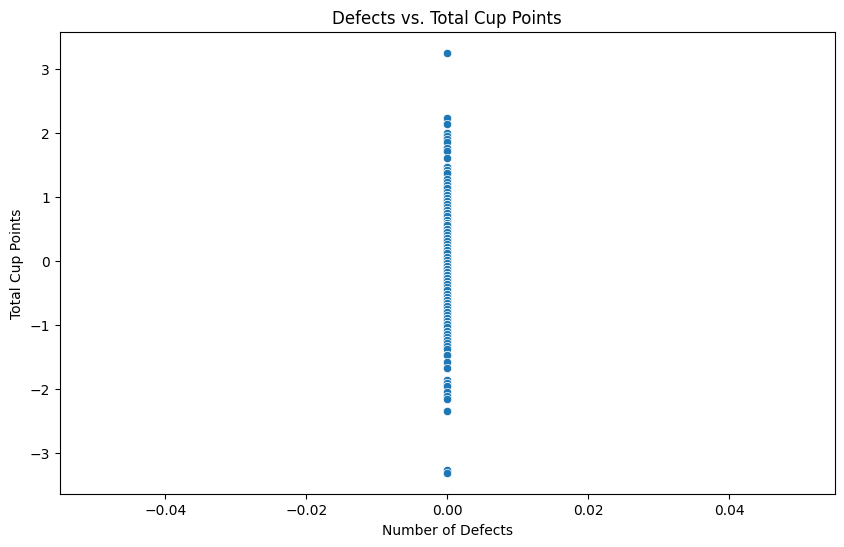

In [73]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Defects', y='Total Cup Points', data=data)
plt.title('Defects vs. Total Cup Points')
plt.xlabel('Number of Defects')
plt.ylabel('Total Cup Points')
plt.show()


Insight: The scatter plot of Defects versus Total Cup Points reveals a trend where higher defects generally correspond to lower total cup points.

Clear Trend: The scatter plot reveals a trend where higher defect counts generally lead to lower Total Cup Points, reinforcing the negative impact of defects on quality.

Quality by Processing Method

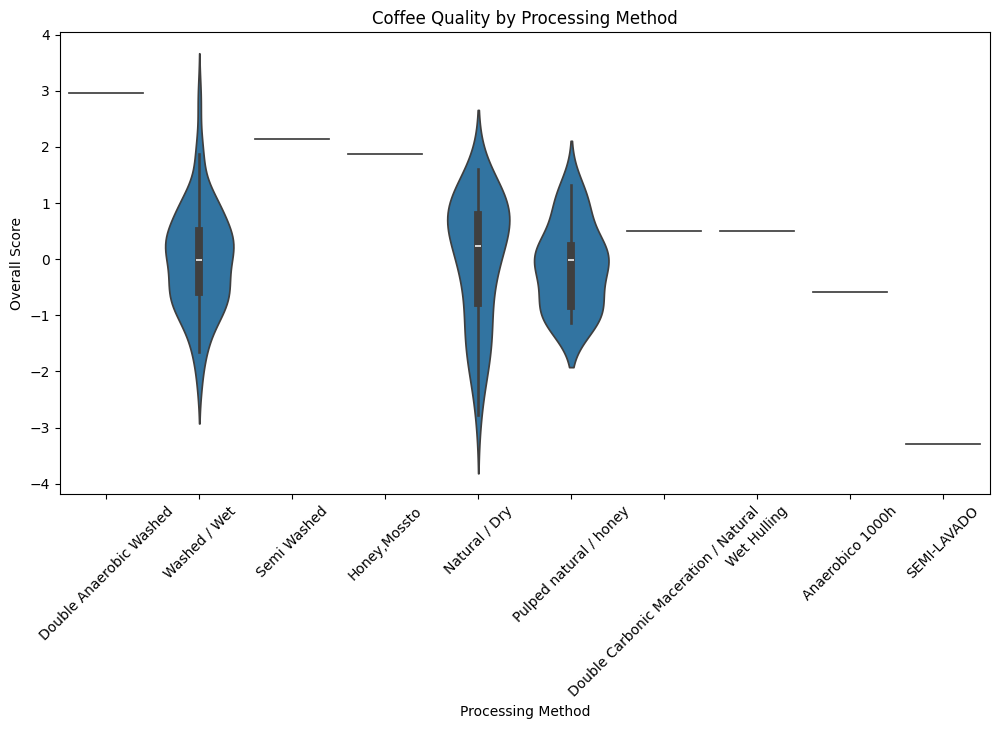

In [74]:
# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Processing Method', y='Overall', data=data)
plt.title('Coffee Quality by Processing Method')
plt.xlabel('Processing Method')
plt.ylabel('Overall Score')
plt.xticks(rotation=45)
plt.show()


Insight: The violin plot illustrates the distribution of overall quality scores across different processing methods.

Processing Methods: The violin plot shows different distributions of quality scores across various processing methods. 
Some methods, like "Double Anaerobic Washed," tend to yield higher quality scores and have less variability.
Density of Scores: The density plots indicate which processing methods are associated with higher or more consistent quality.

In [83]:
# Average Number of Bags by Country of Origin with Pie Chart
average_bags_per_origin = data.groupby('Country of Origin')['Number of Bags'].mean().reset_index()

# Pie Chart
sizes = average_bags_per_origin['Number of Bags']
labels = average_bags_per_origin['Country of Origin']
explode = [0.1 if i == 0 else 0 for i in range(len(sizes))]

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Average Number of Bags by Country of Origin')

plt.show()

KeyError: 'Country of Origin'

## Question 2

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load the data
data = pd.read_csv('Question 1.csv')

In [96]:

# Drop non-numeric columns and identify features and target variable
numerical_features = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects', 'Moisture Percentage', 'Category One Defects', 'Quakers', 'Category Two Defects']
categorical_features = ['Farm Name', 'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer', 'Bag Weight', 'In-Country Partner', 'Harvest Year', 'Processing Method', 'Owner', 'Variety', 'Status']


In [97]:
# Define features and target
X = data[numerical_features + categorical_features]
y = data['Total Cup Points']

In [98]:

# Handle missing values
X = X.fillna('Unknown')  # Fill categorical missing values
y = y.fillna(y.mean())   # Fill numerical missing values with mean

In [89]:

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create and evaluate the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                         ('regressor', LinearRegression())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Aroma', 'Flavor',
                                                   'Aftertaste', 'Acidity',
                                                   'Body', 'Balance',
                                                   'Uniformity', 'Clean Cup',
                                                   'Sweetness', 'Overall',
                                                   'Defects',
                                                   'Moisture Percentage',
                                                   'Category One Defects',
                                                   'Quakers',
                                                   'Category Two Defects']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Farm Name', 'Mill',
                                                   'ICO Number', 'Company',
                                                   'Altitude', 'Region',
                                                   'Producer', 'Bag Weight',
                                                   'In-Country Partner',
                                                   'Harvest Year',
                                                   'Processing Method', 'Owner',
                                                   'Variety', 'Status'])])),
                ('regressor', LinearRegression())])

In [91]:
# Make predictions
y_pred = model.predict(X_test)

In [93]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 0.00
R^2 Score: 1.00


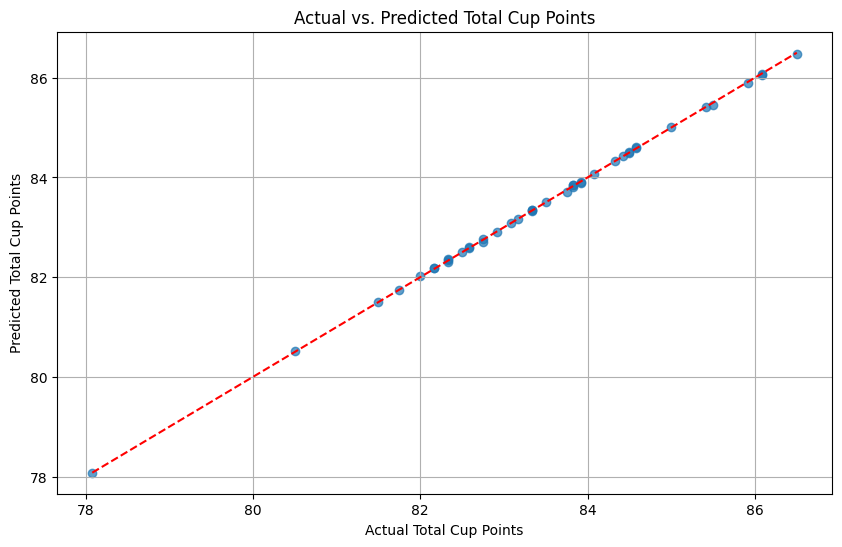

In [94]:

# Visualize predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Total Cup Points')
plt.ylabel('Predicted Total Cup Points')
plt.title('Actual vs. Predicted Total Cup Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()


#### **Correlation between continuous variables and continuous target**

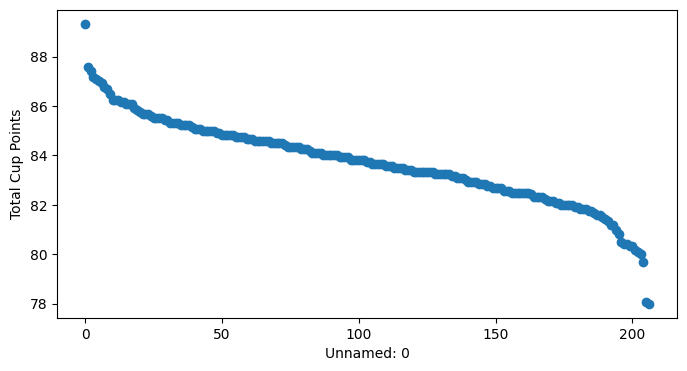

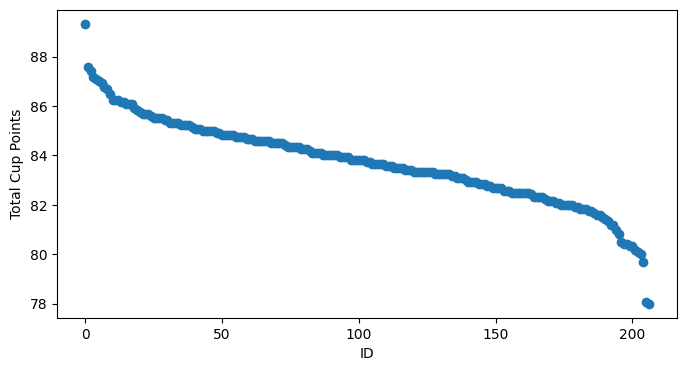

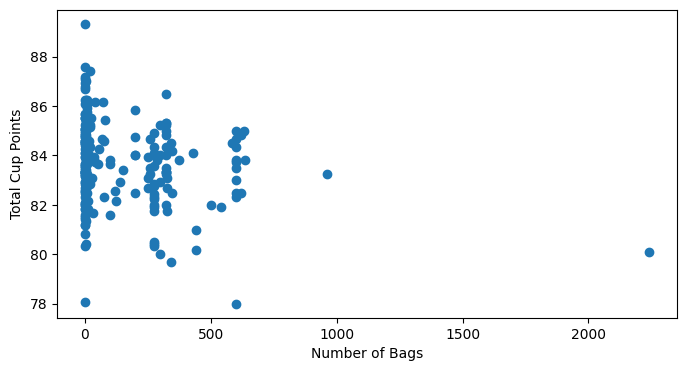

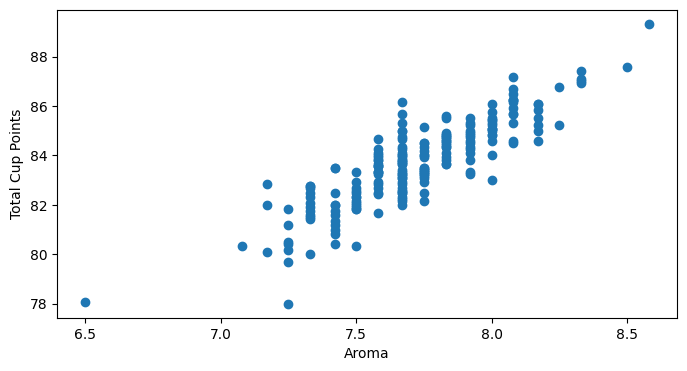

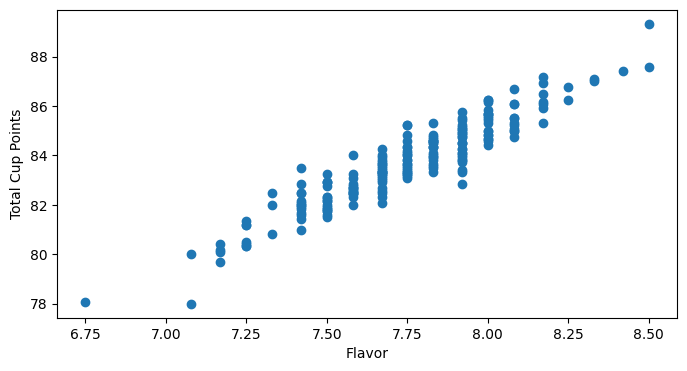

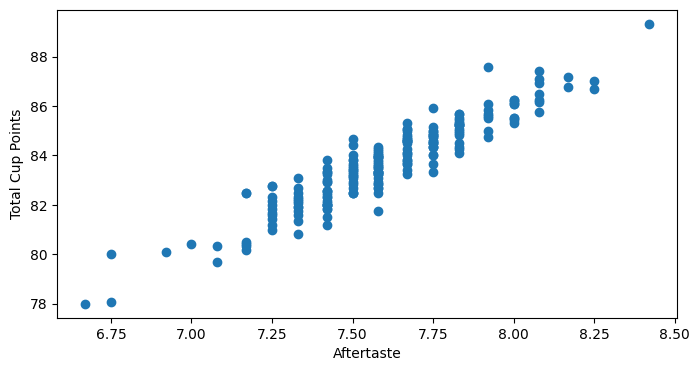

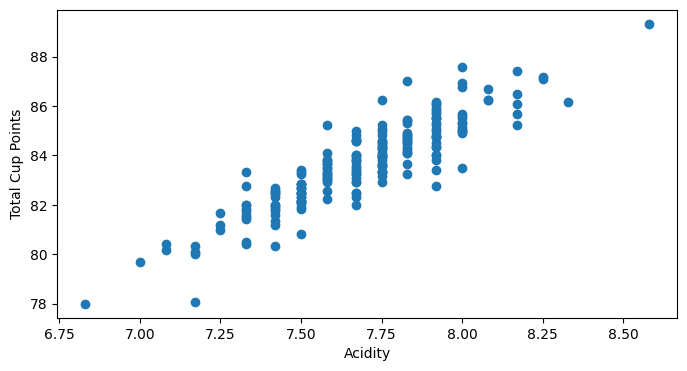

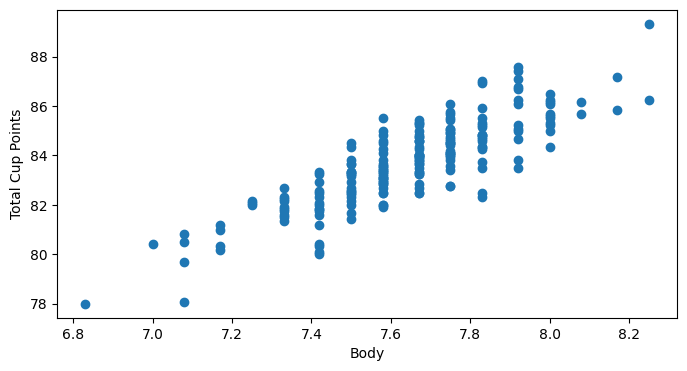

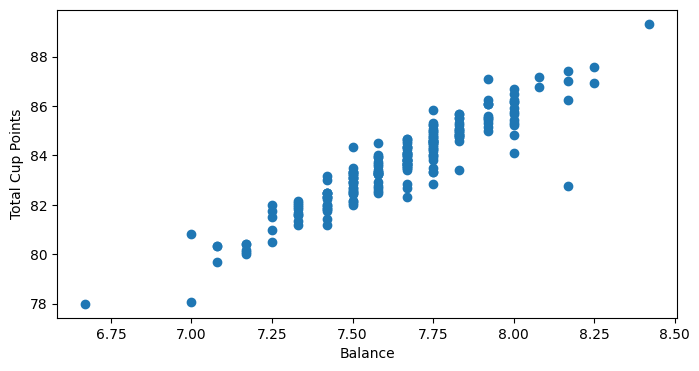

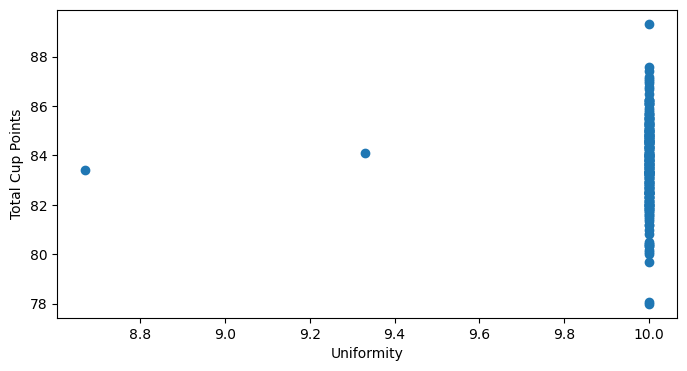

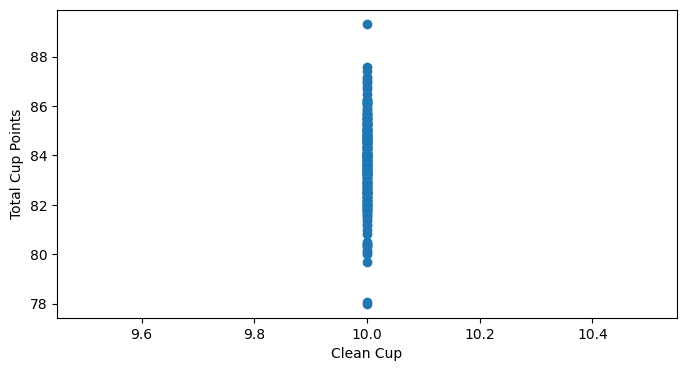

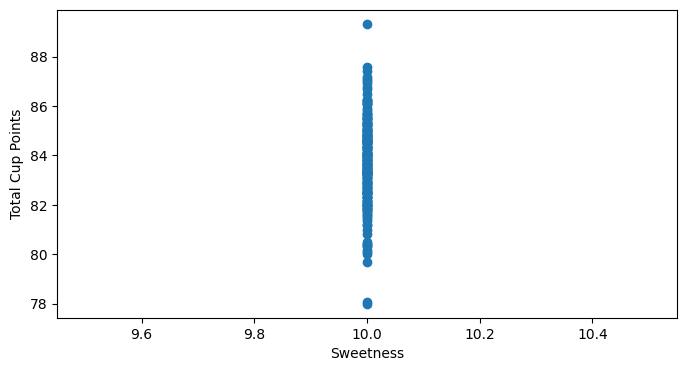

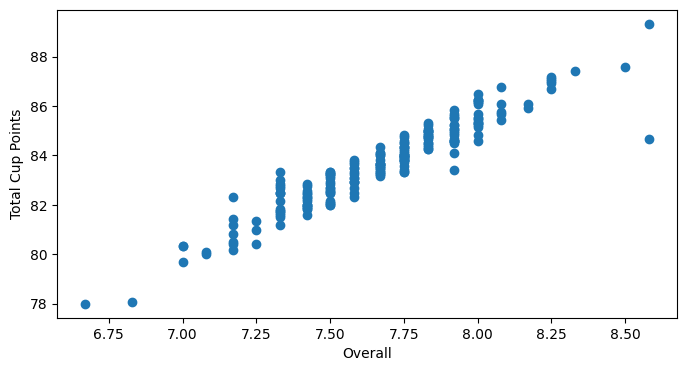

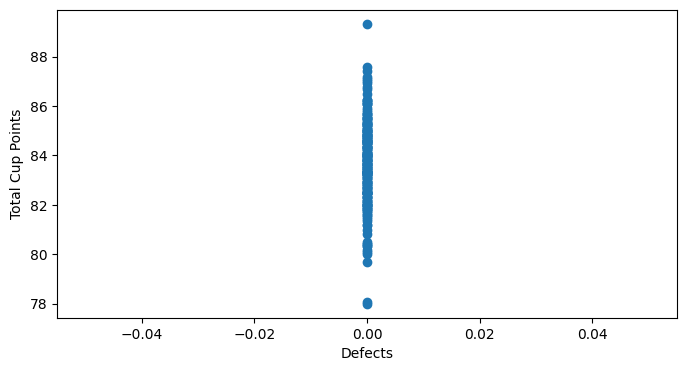

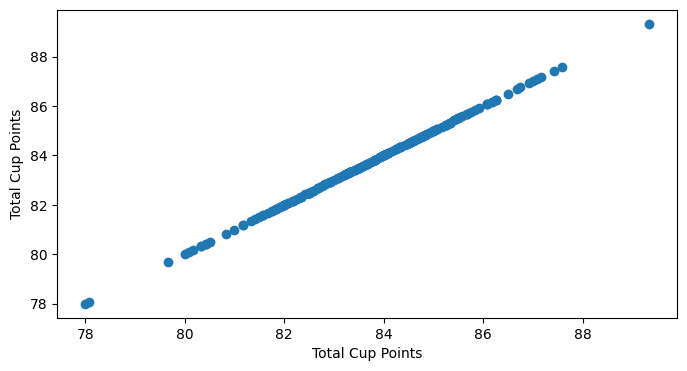

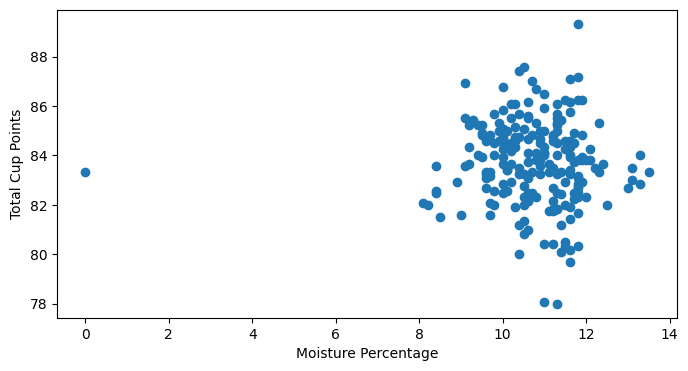

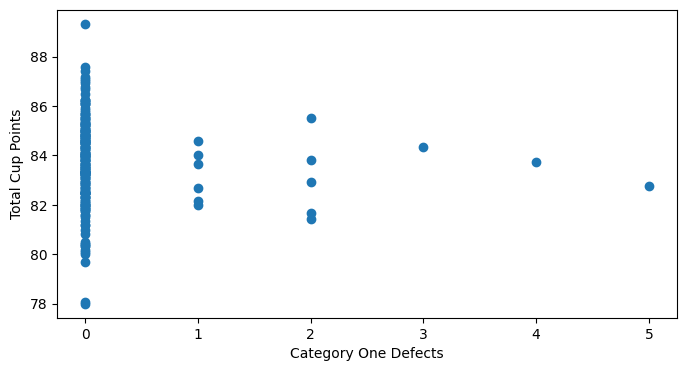

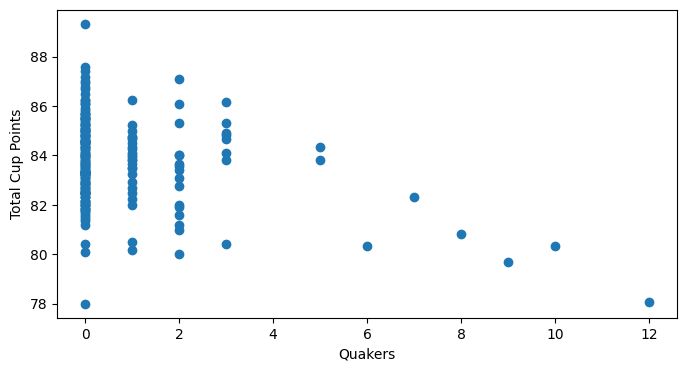

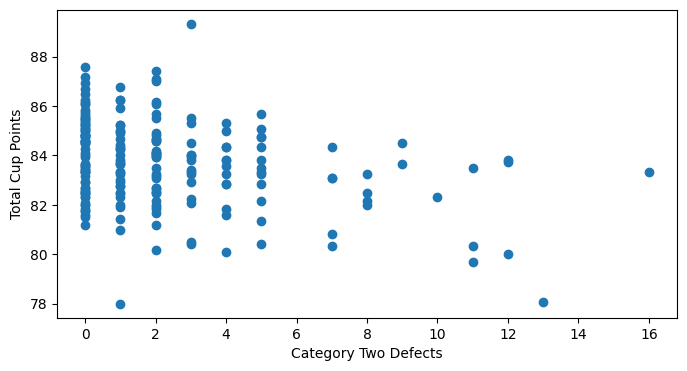

In [102]:
# Using Scatterplot for continous predictors and continous target
cont_var = data.select_dtypes(include='number').columns
target_var = 'Total Cup Points'

for PredictorCol , i in zip(cont_var, range(len(cont_var))):
    # Removed height, width and aspect arguments and used plt.figure() to control figure size
    plt.figure(figsize=(8,4)) # Set figure size here
    plt.scatter(x=data[PredictorCol], y=data[target_var]) # Changed predn_df to pred_df
    plt.xlabel(PredictorCol)
    plt.ylabel(target_var)
    plt.show()

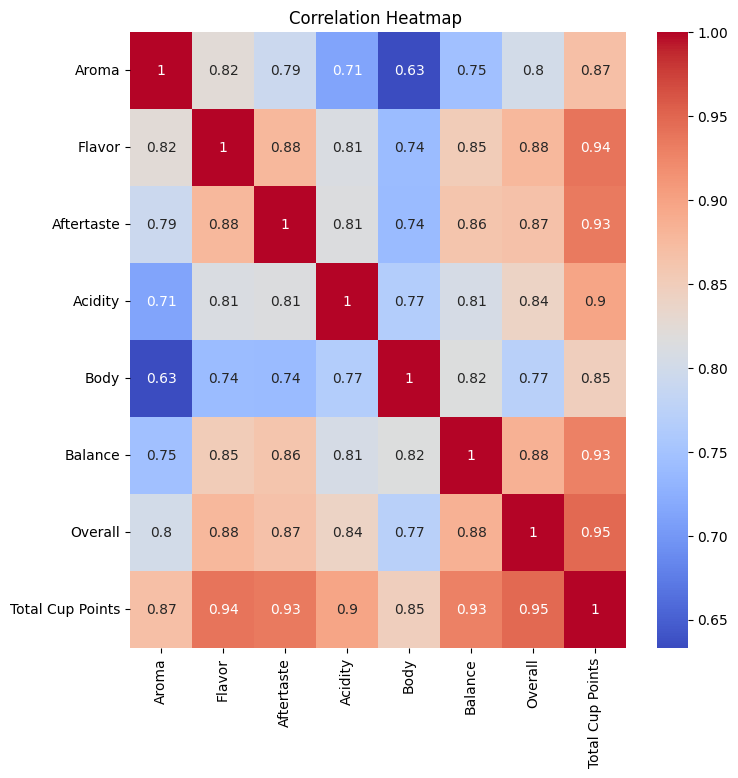

In [104]:
# verifying correlation between Aroma, Flavor, Aftertaste, Acidity, Body, Balance, Overall and Total Cup Points using correlation matrix
corr_var = [ 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall','Total Cup Points']
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data[corr_var].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap ')
plt.show()

#### **Correlation between categorical variables and continuous target**

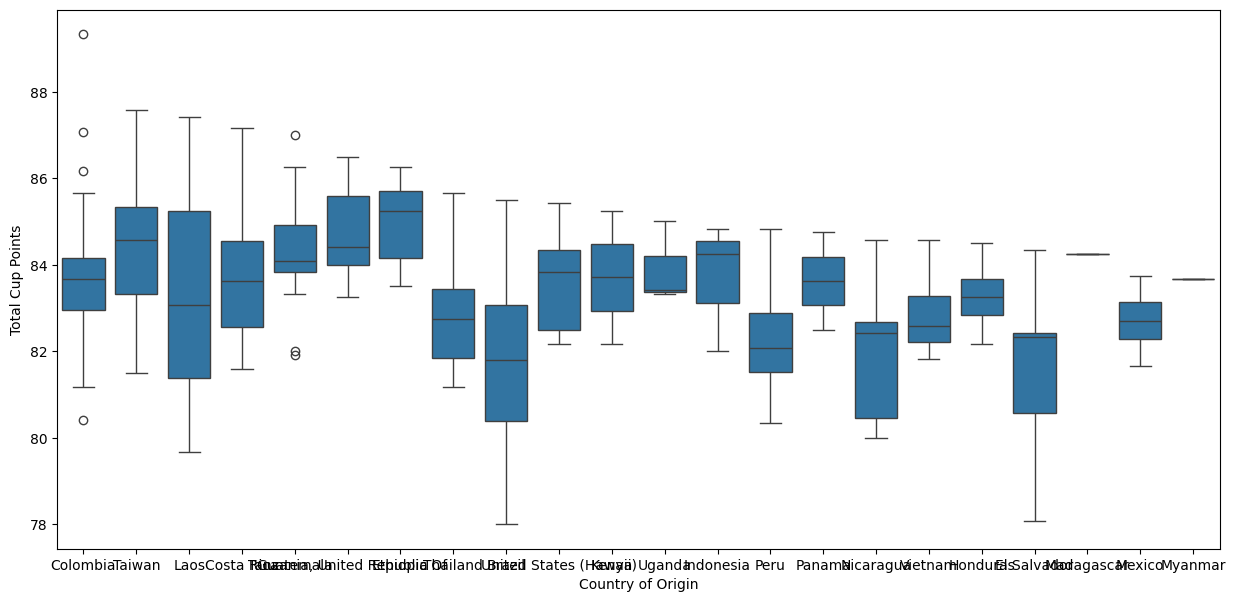

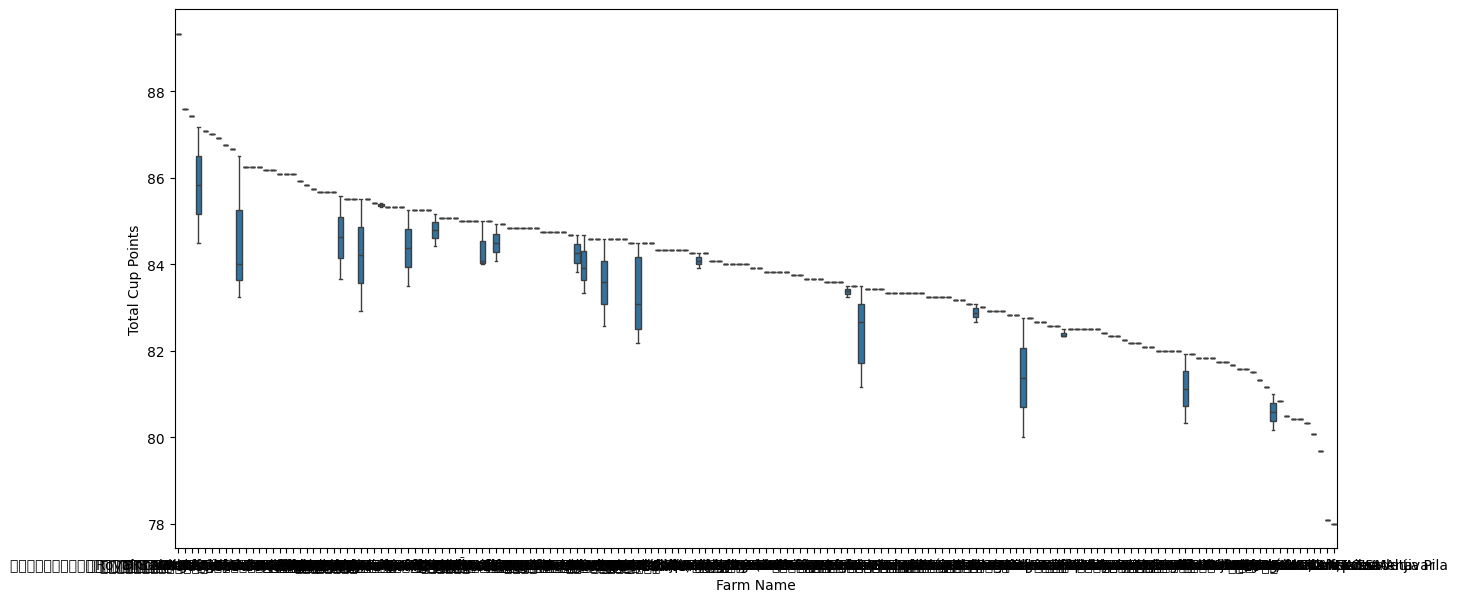

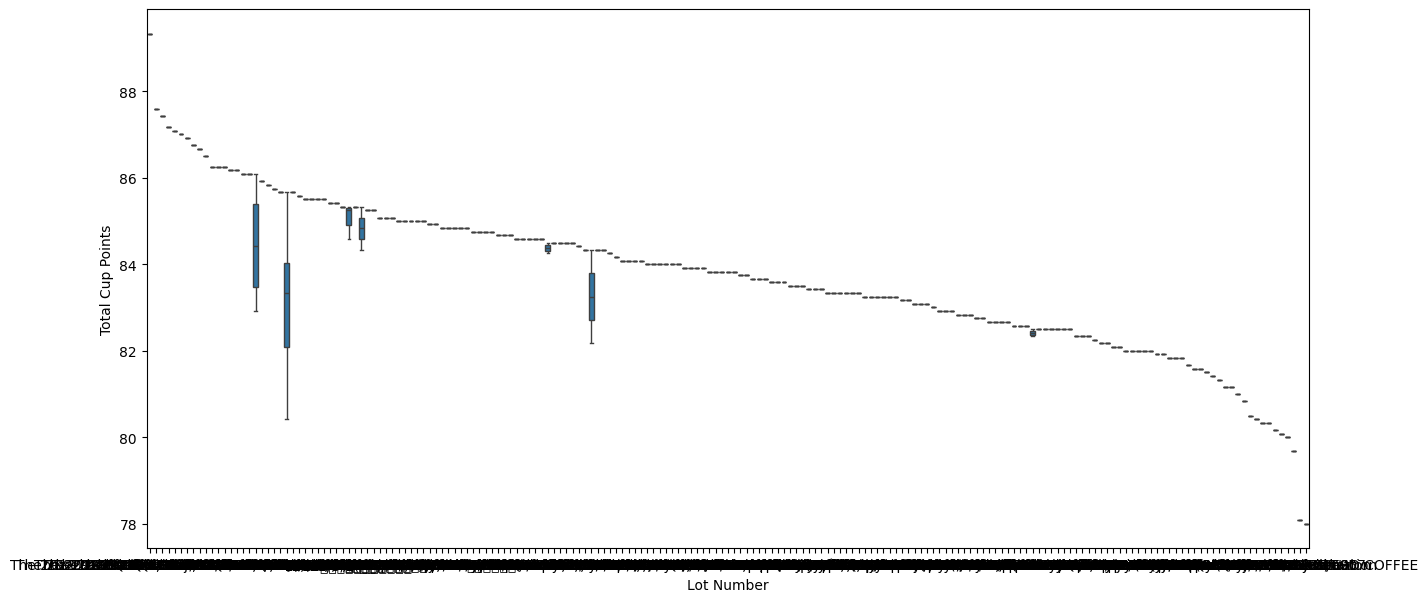

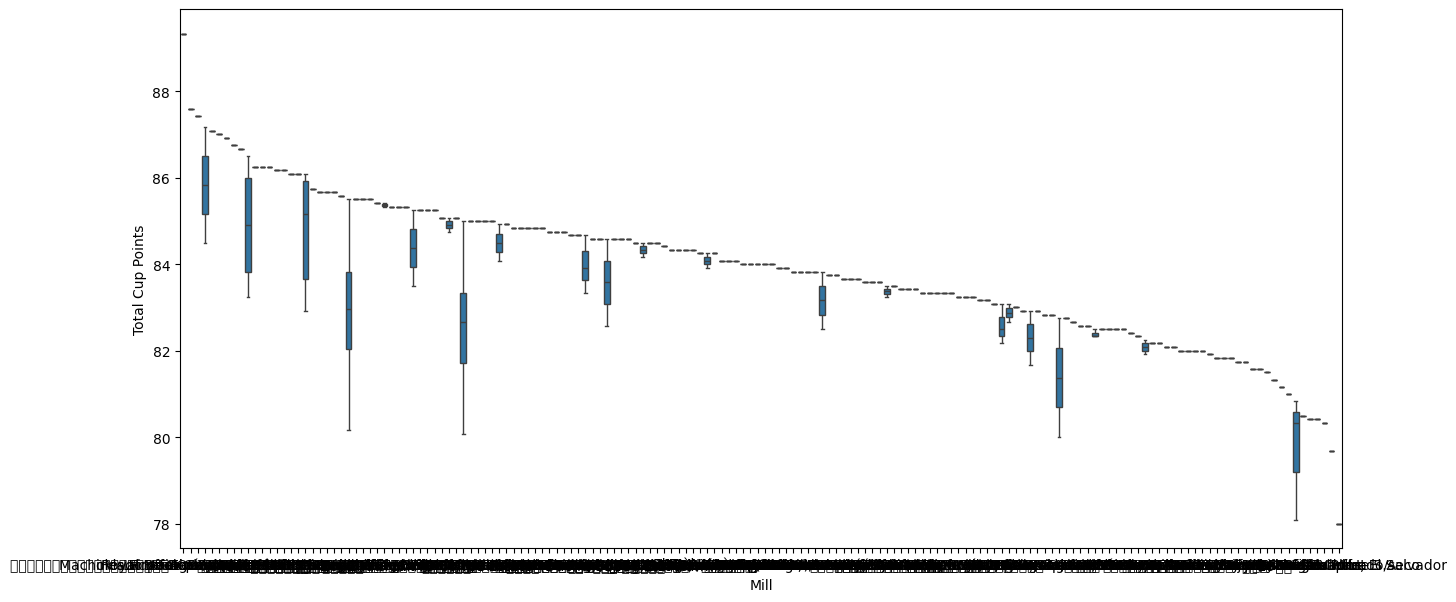

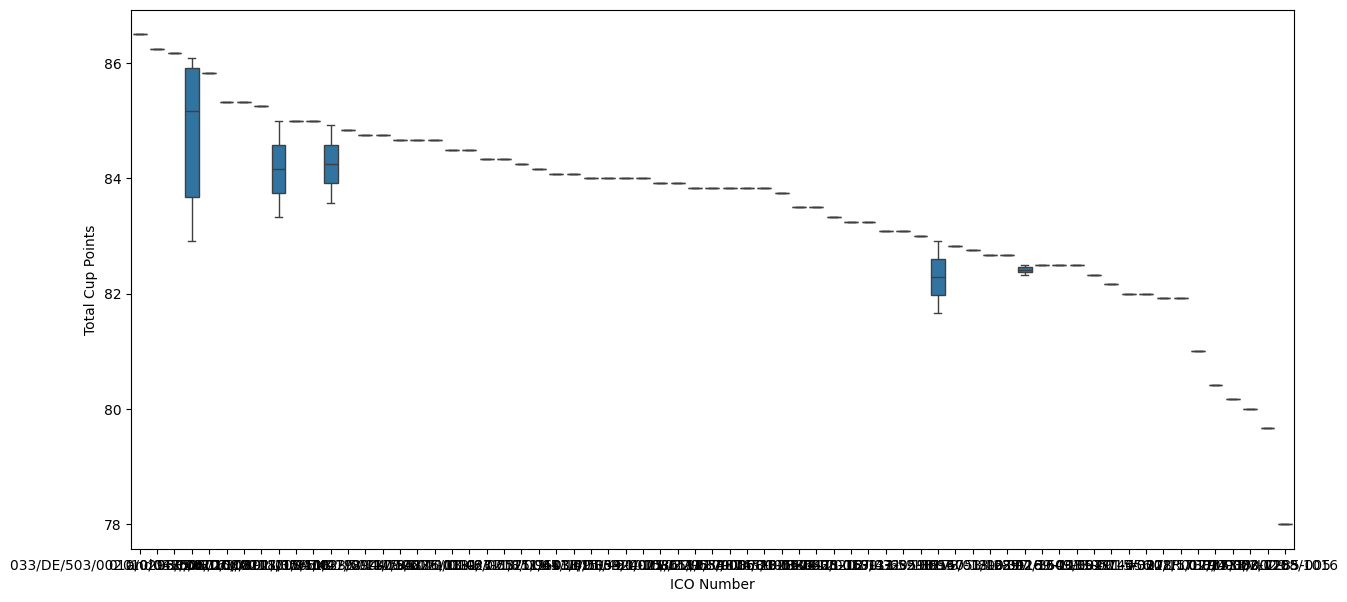

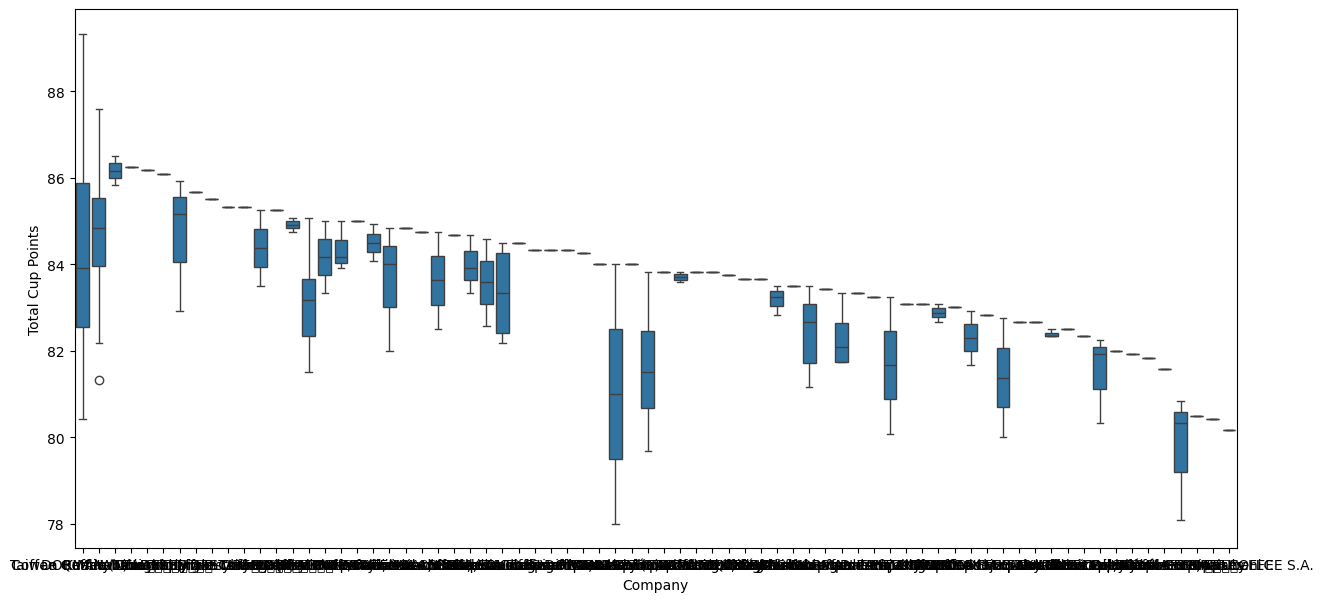

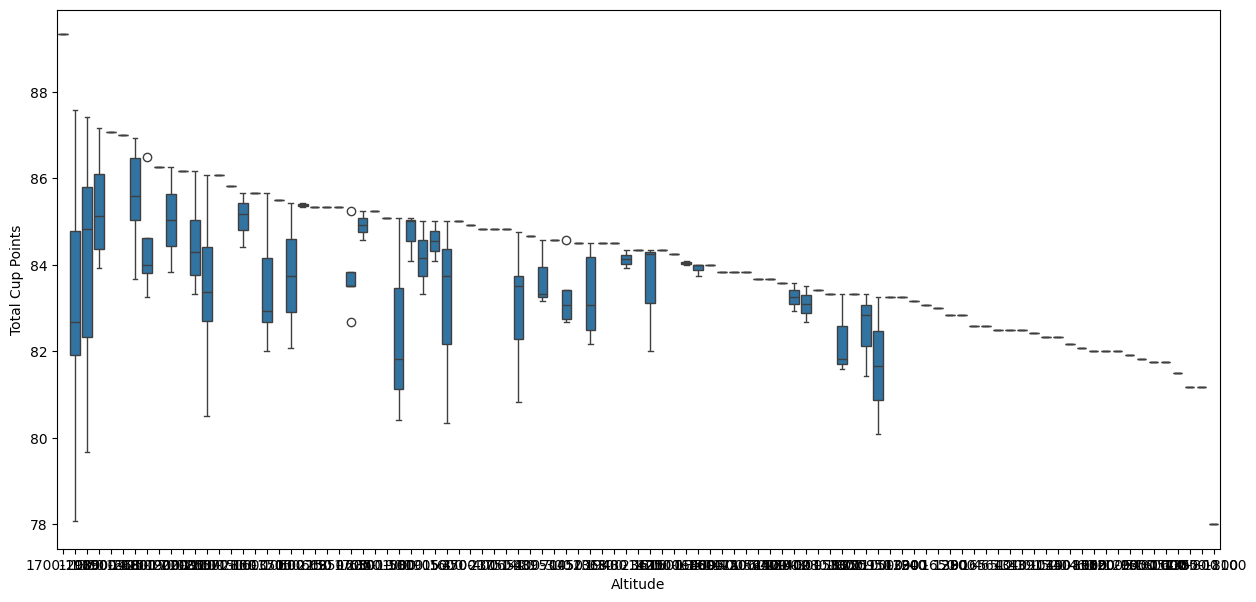

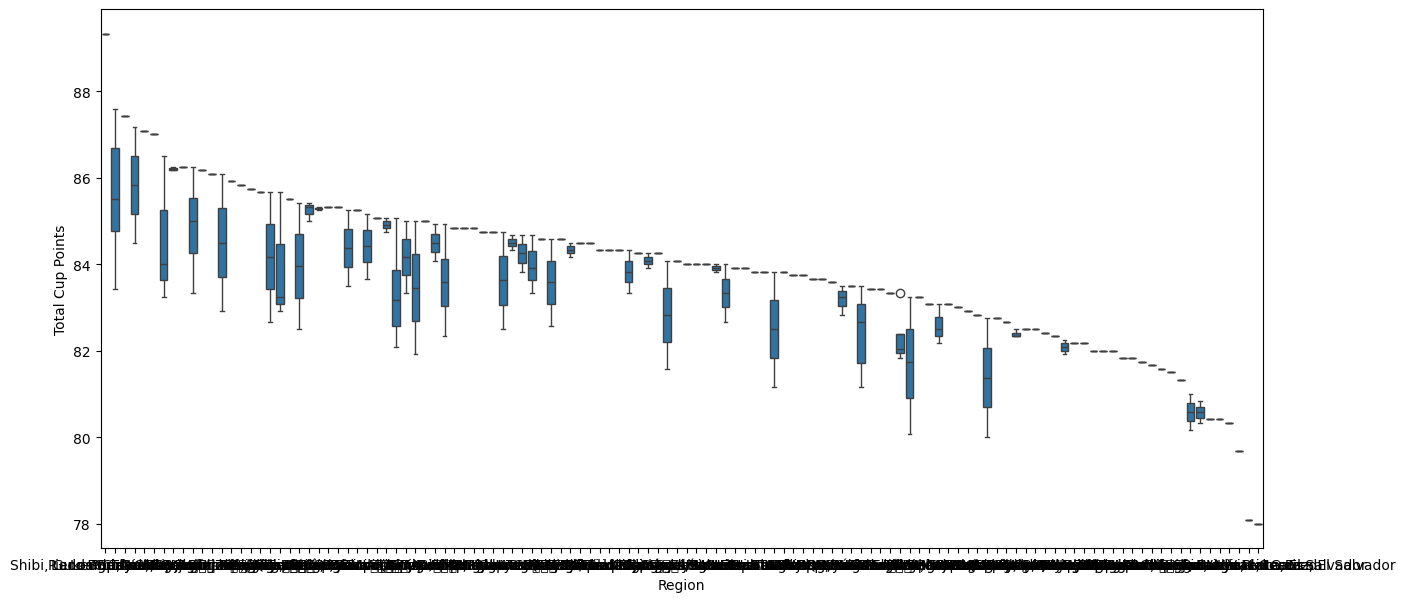

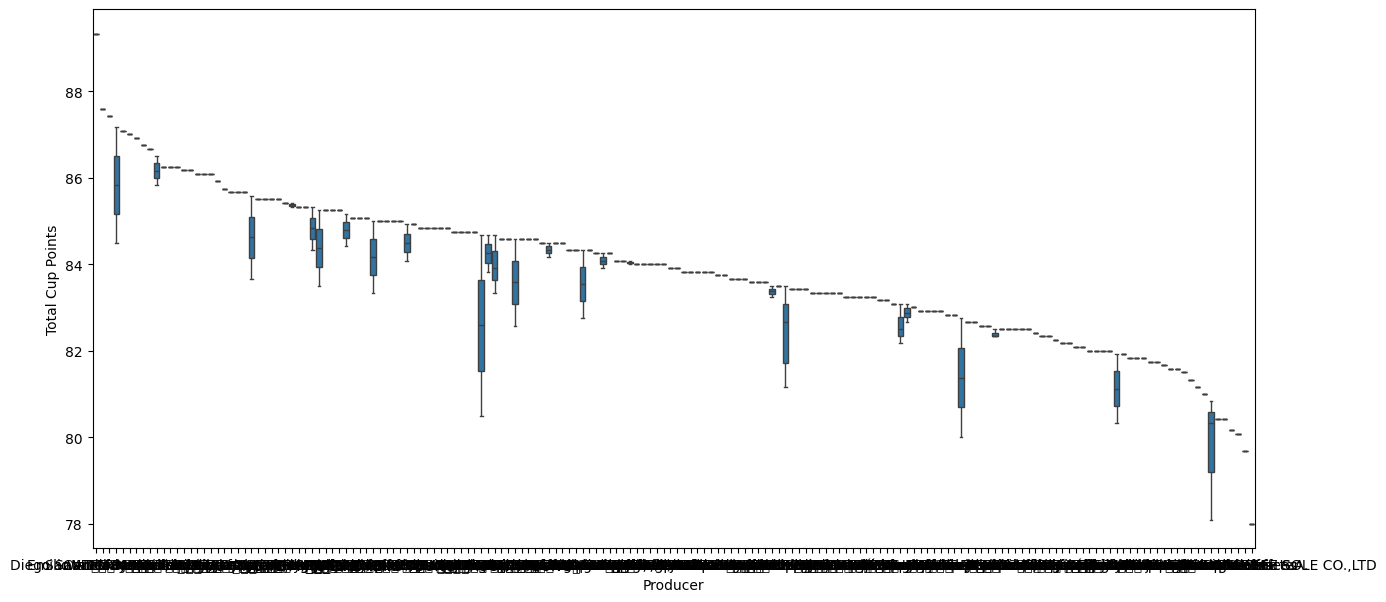

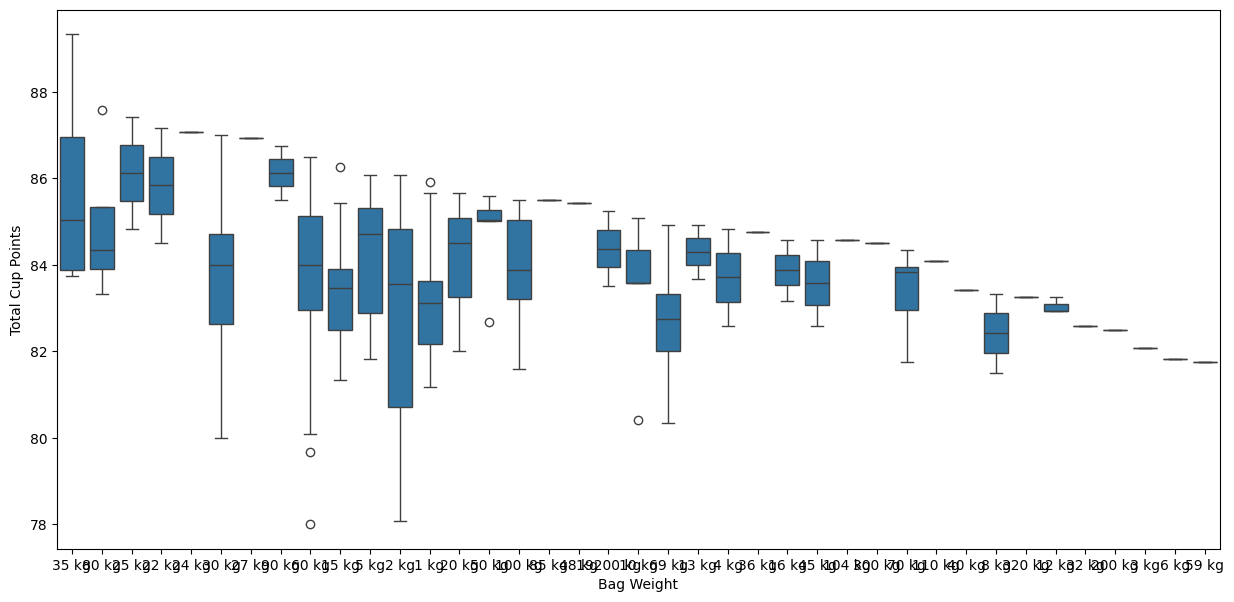

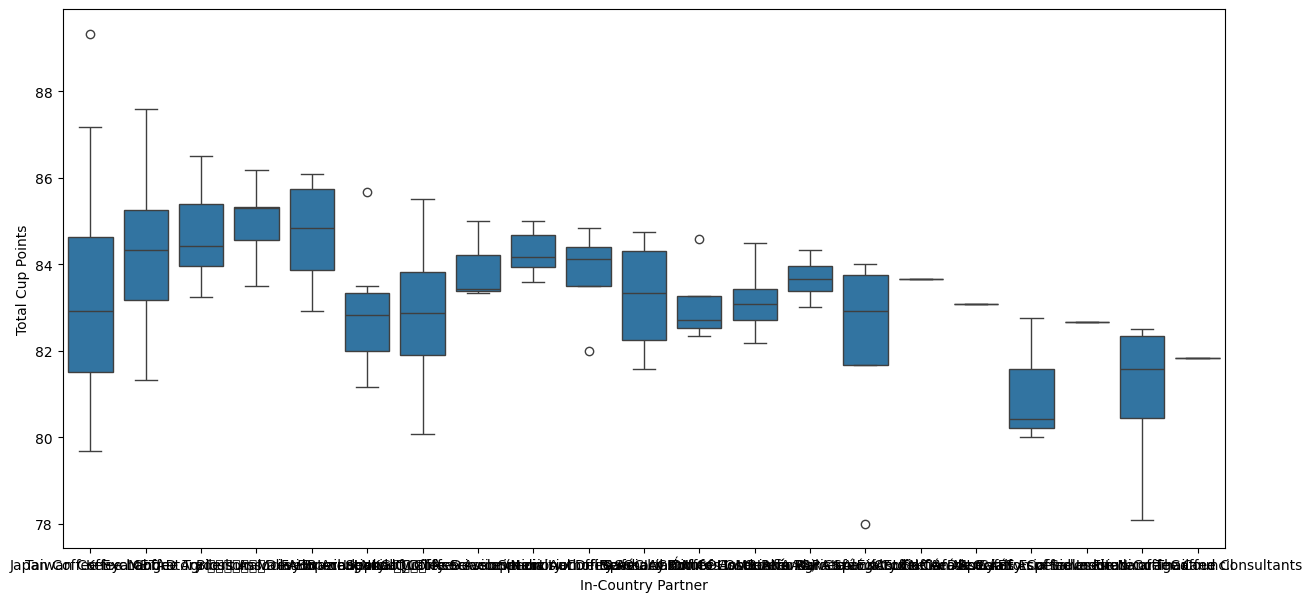

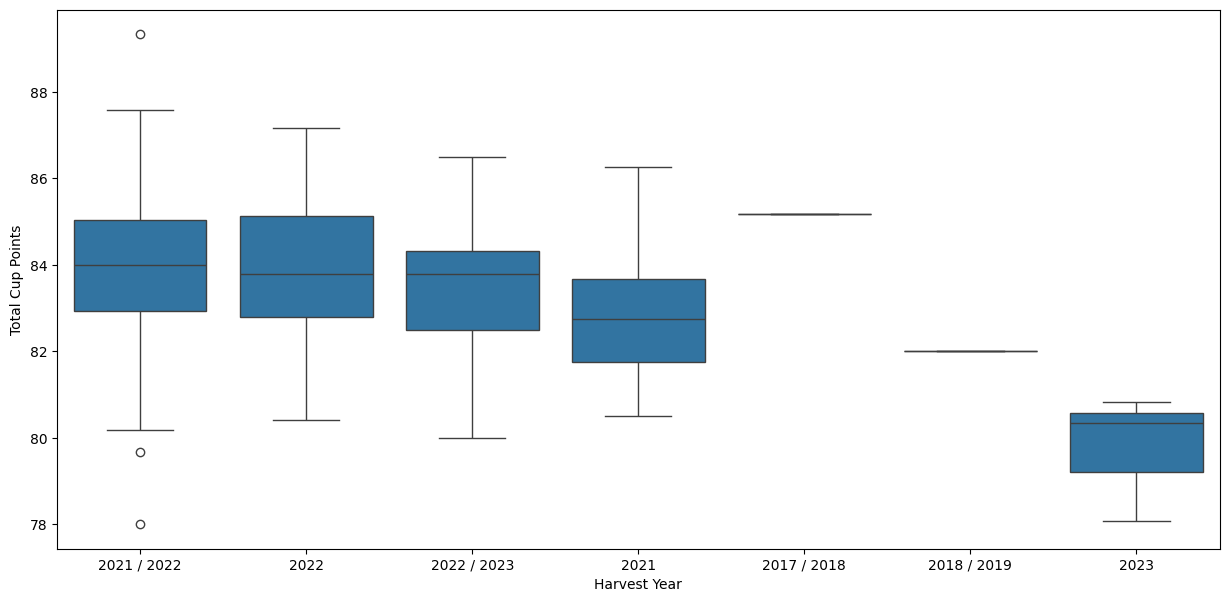

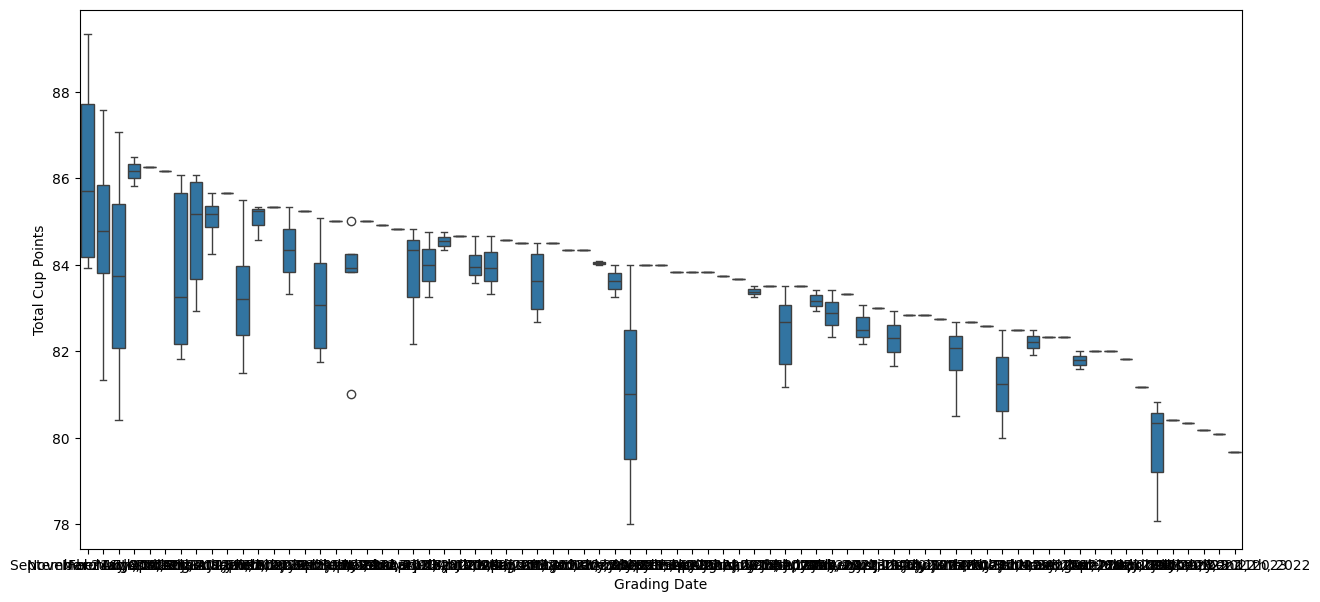

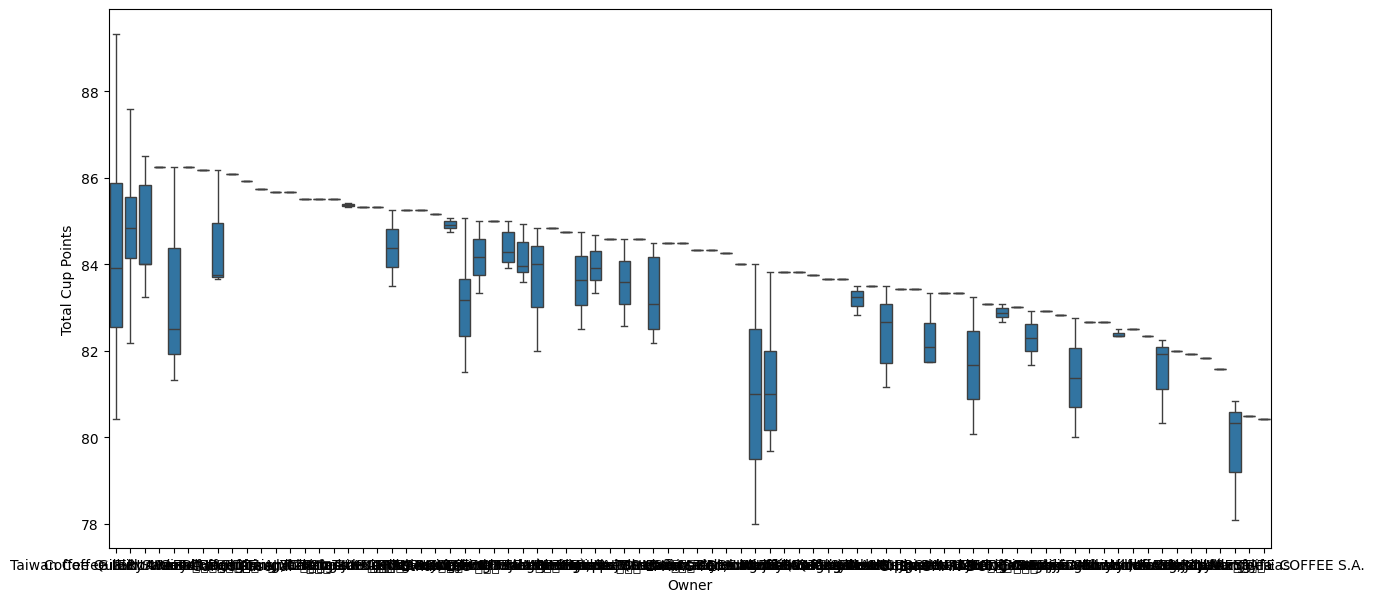

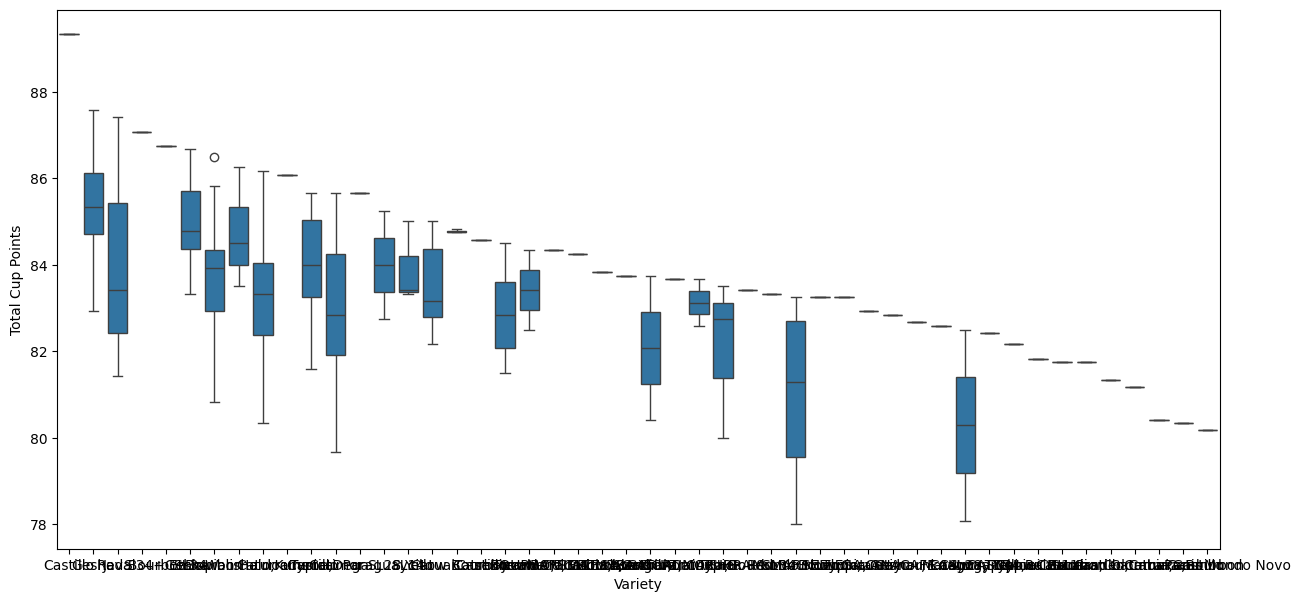

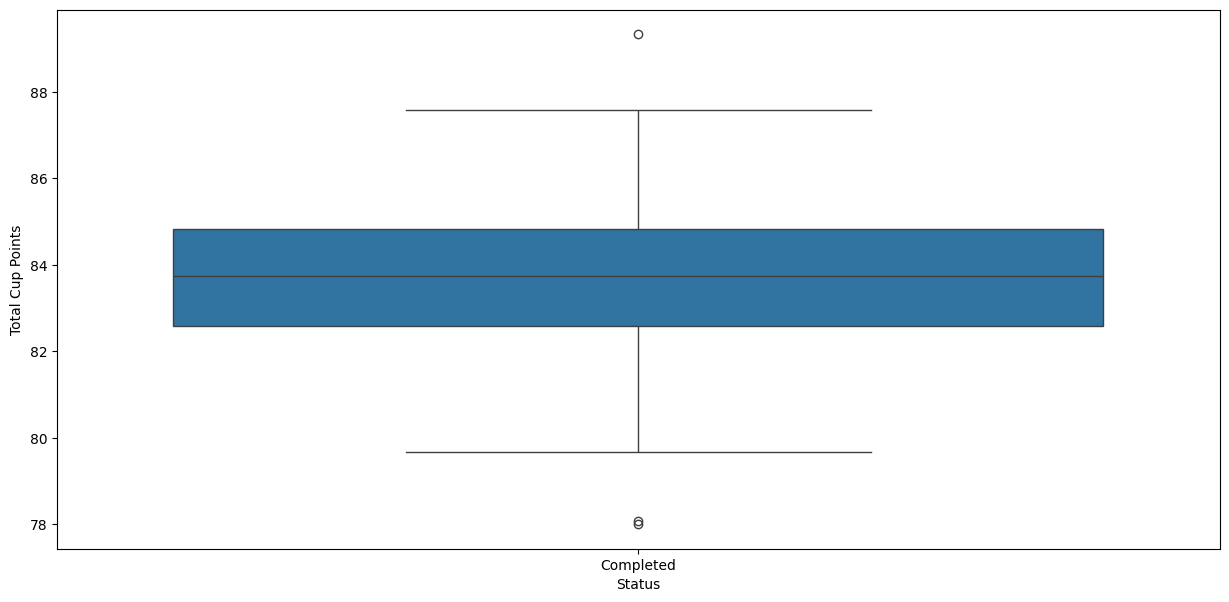

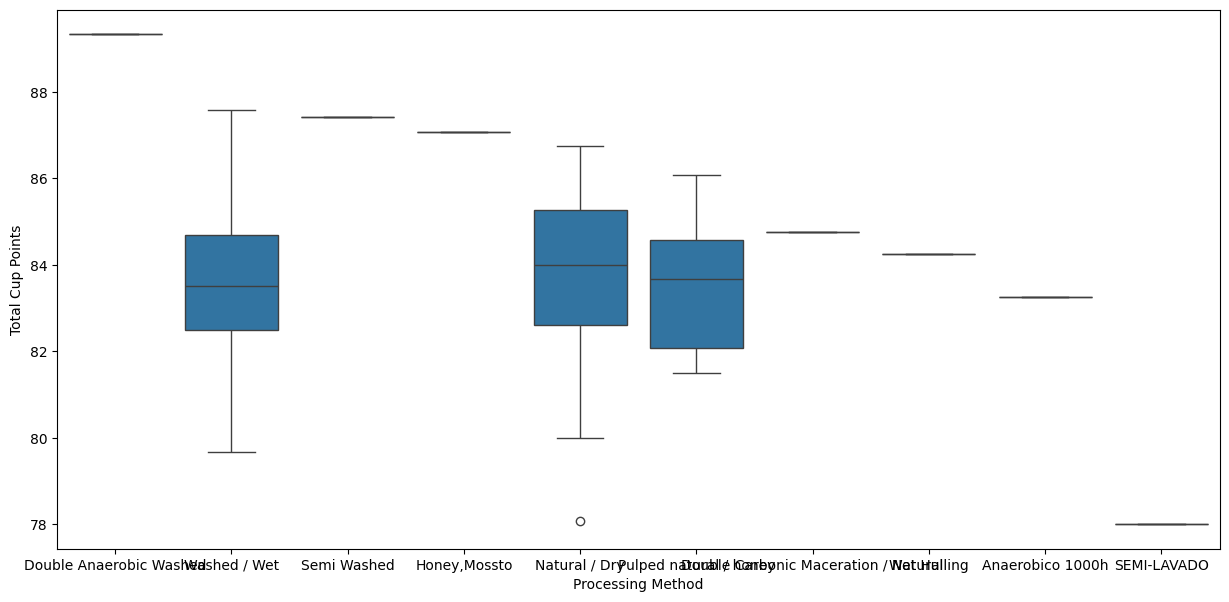

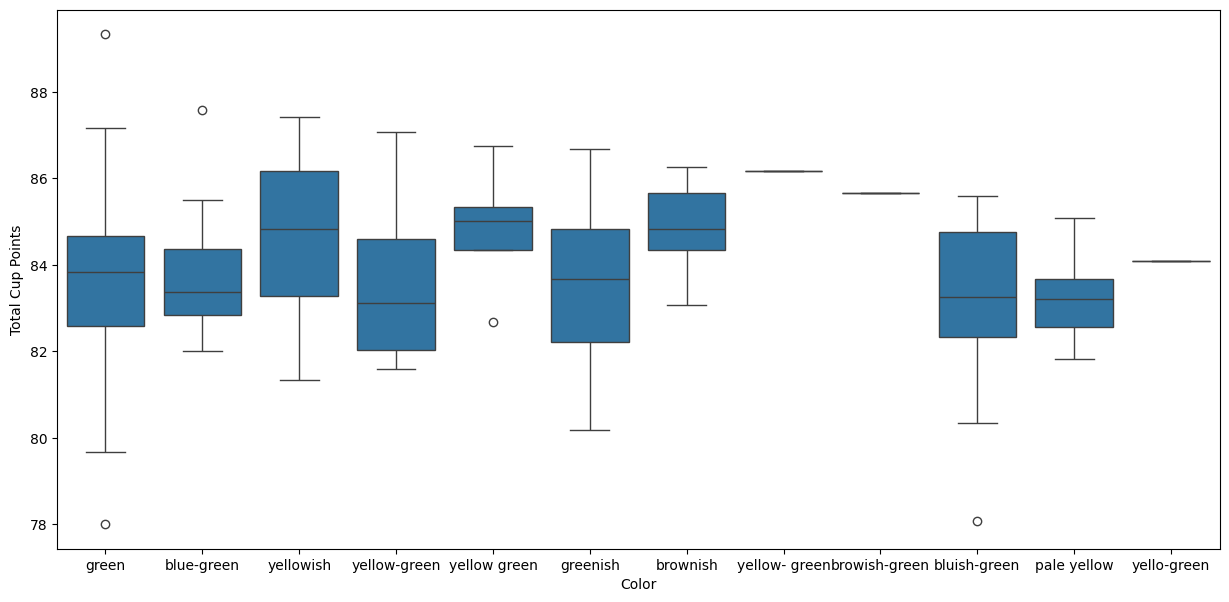

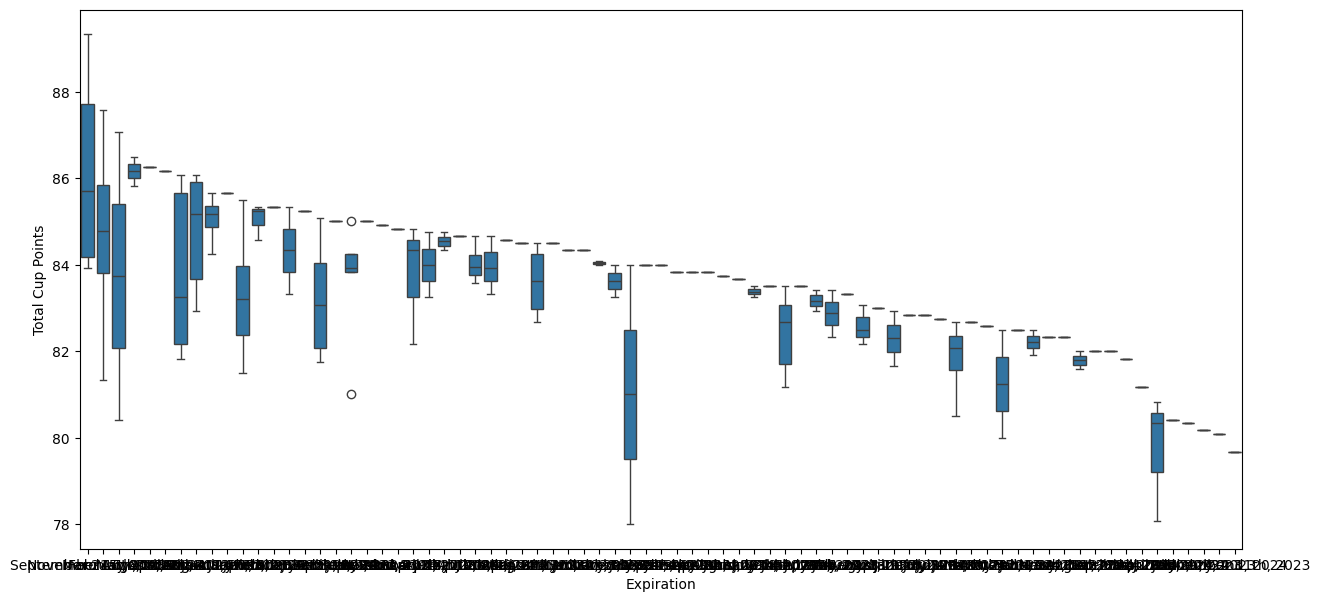

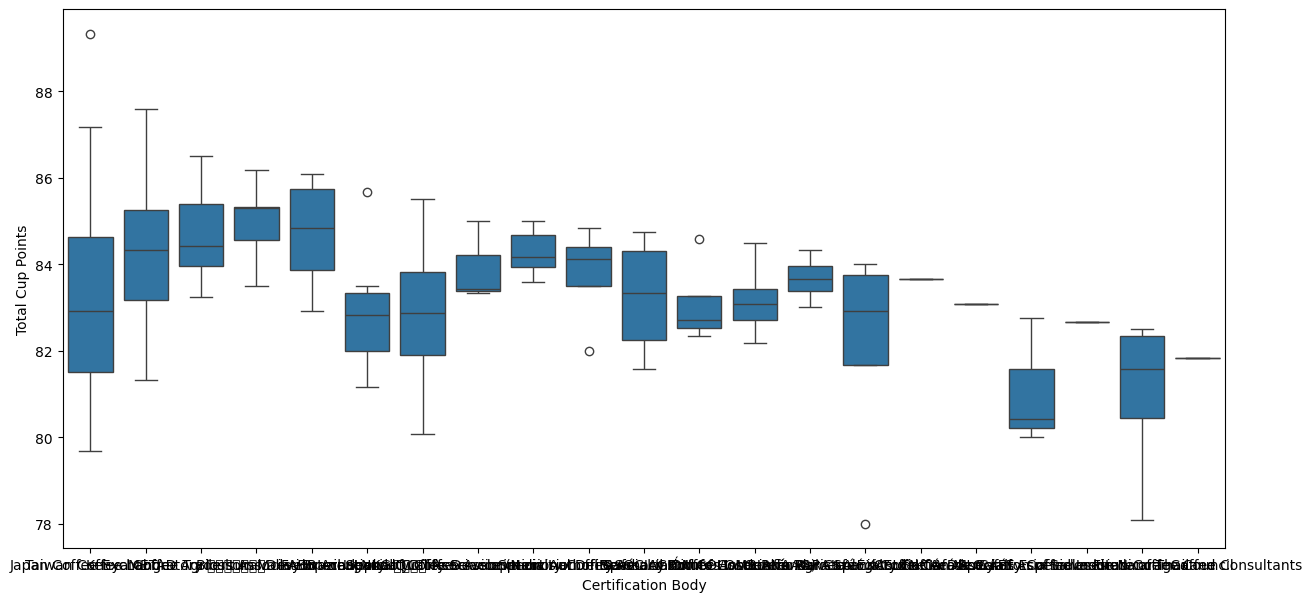

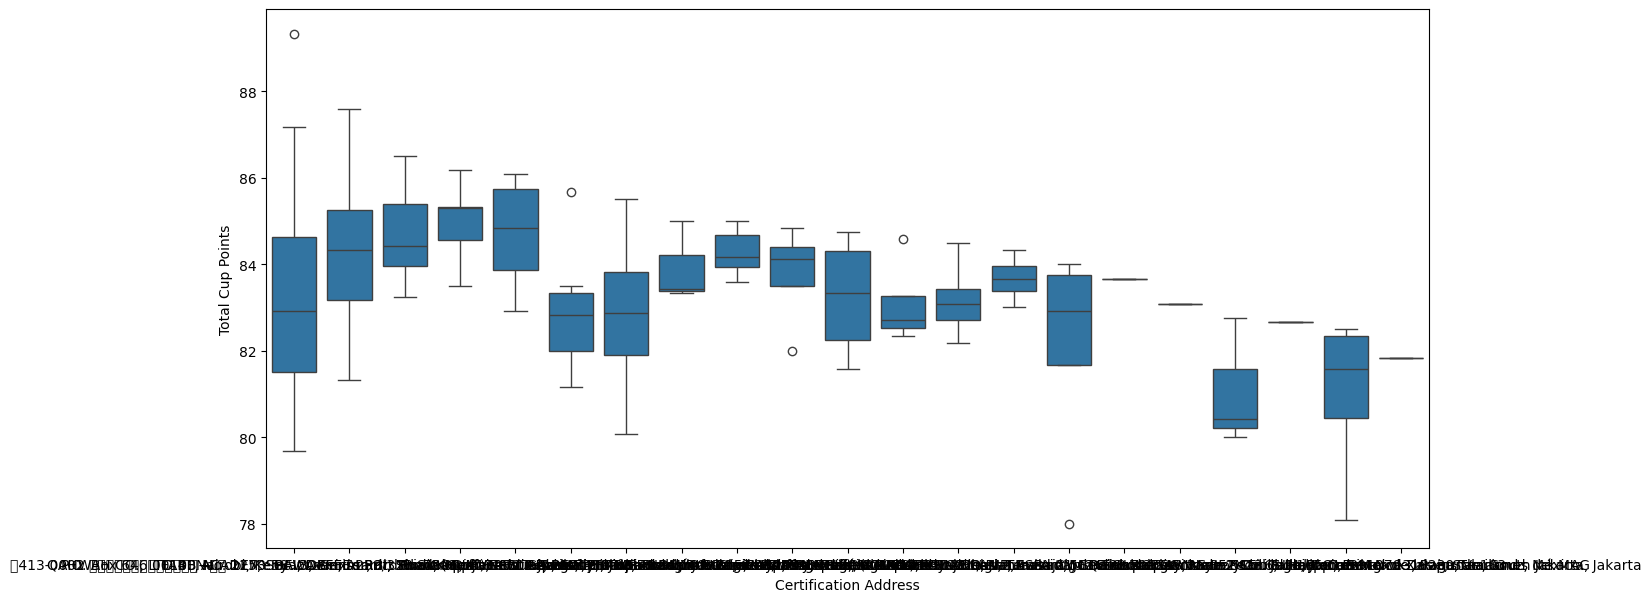

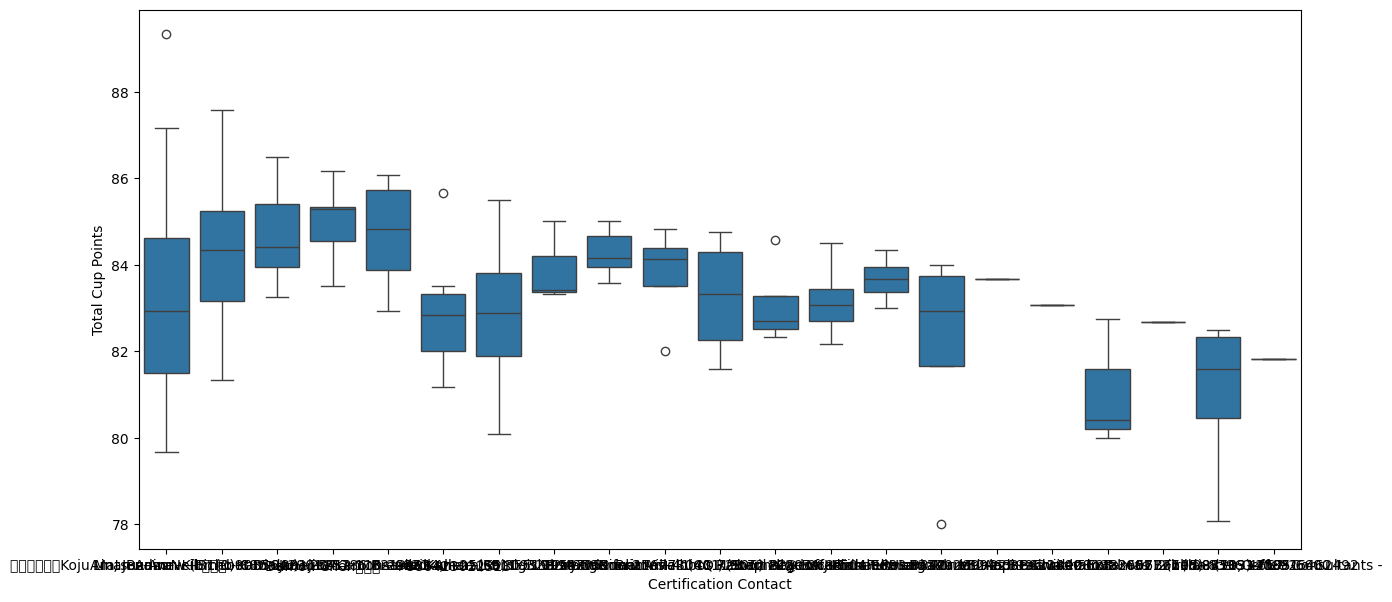

In [105]:
cat_var = data.select_dtypes(include='object').columns
target_var = 'Total Cup Points'

for PredictorCol , i in zip(cat_var, range(len(cat_var))):
  plt.figure(figsize=(15,7))
  sns.boxplot(x=data[PredictorCol], y=data[target_var])
  plt.xlabel(PredictorCol)
  plt.ylabel(target_var)
  plt.show()

Generally, Categories in most if not all categorical columns depect varrying median indicating a correlation. However, the strength of the correlation needs to be determined. Additionally, some categories in the categorical variables are dominant compared to other making it difficult to establish the correlation. we shall however, test for correlation using ANOVA test

In [106]:
# Using ANOVA test to check for correlation.
target_var = 'Total Cup Points'
predictors = data.select_dtypes(include='object').columns

# The null hypothesis here is that the means are equal, and the alternative hypothesis is that they are not.
# A big f, with a small p-value, means that the null hypothesis is discredited,
# and we would assert that the means are significantly different (while a small t, with a big p-value indicates that they are not significantly different).

# ANOVA test function
def ANOVATest(data, target_var, predictors):

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in predictors:
        CategoryGroupLists=data.groupby(predictor)[target_var].apply(list)
        # Check if there are at least two groups for ANOVA
        if len(CategoryGroupLists) >= 2:
            AnovaResults = f_oneway(*CategoryGroupLists)

            # If the ANOVA f value is great and P-Value is <0.05, that means we reject H0
            if AnovaResults[1] < 0.05:
                print(predictor, 'is correlated with', target_var, '| P-Value:', AnovaResults[1])
                SelectedPredictors.append(predictor)
            else:
                print(predictor, 'is NOT correlated with', target_var, '| P-Value:', AnovaResults[1])

        else:
            print(f"Skipping ANOVA for '{predictor}' - Not enough groups.")

    return(SelectedPredictors)

In [108]:
# using the ANOVATest function
ANOVATest(data, target_var, predictors)

##### ANOVA Results ##### 

Country of Origin is correlated with Total Cup Points | P-Value: 3.306408704331894e-06
Farm Name is correlated with Total Cup Points | P-Value: 0.00010834161104551589
Lot Number is NOT correlated with Total Cup Points | P-Value: 0.07466107501447306
Mill is correlated with Total Cup Points | P-Value: 0.001990014530709431
ICO Number is NOT correlated with Total Cup Points | P-Value: 0.1542496290332566
Company is correlated with Total Cup Points | P-Value: 1.5352872853293703e-05
Altitude is NOT correlated with Total Cup Points | P-Value: 0.26513017662420746
Region is correlated with Total Cup Points | P-Value: 3.9063492883940654e-09
Producer is correlated with Total Cup Points | P-Value: 0.00014681564146432747
Bag Weight is correlated with Total Cup Points | P-Value: 0.04559100731915296
In-Country Partner is correlated with Total Cup Points | P-Value: 7.277604257359059e-05
Harvest Year is correlated with Total Cup Points | P-Value: 0.00015832282466769532
Gradin

['Country of Origin',
 'Farm Name',
 'Mill',
 'Company',
 'Region',
 'Producer',
 'Bag Weight',
 'In-Country Partner',
 'Harvest Year',
 'Grading Date',
 'Owner',
 'Variety',
 'Processing Method',
 'Expiration',
 'Certification Body',
 'Certification Address',
 'Certification Contact']

In [109]:
# get dataset for correlated feature
df = data[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
                   'Balance', 'Overall', 'Country of Origin', 'Farm Name',
                   'Mill', 'Company', 'Region', 'Producer','In-Country Partner',
                   'Harvest Year', 'Grading Date', 'Owner', 'Variety', 'Processing Method',
                   'Certification Body', 'Certification Address', 'Certification Contact', 'Total Cup Points']]

df.head(2).T

0  \
Aroma                                                               8.58   
Flavor                                                               8.5   
Aftertaste                                                          8.42   
Acidity                                                             8.58   
Body                                                                8.25   
Balance                                                             8.42   
Overall                                                             8.58   
Country of Origin                                               Colombia   
Farm Name                                               Finca El Paraiso   
Mill                                                    Finca El Paraiso   
Company                                             Coffee Quality Union   
Region                                                    Piendamo,Cauca   
Producer                                           Diego Samuel Bermudez   
In-Country Partner                                 Japan Coffee Exchange   
Harvest Year                                                 2021 / 2022   
Grading Date                                        September 21st, 2022   
Owner                                               Coffee Quality Union   
Variety                                                         Castillo   
Processing Method                                Double Anaerobic Washed   
Certification Body                                 Japan Coffee Exchange   
Certification Address  〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...   
Certification Contact            松澤　宏樹　Koju Matsuzawa - +81(0)9085642901   
Total Cup Points                                                   89.33   

                                                                       1  
Aroma                                                                8.5  
Flavor                                                               8.5  
Aftertaste                                                          7.92  
Acidity                                                              8.0  
Body                                                                7.92  
Balance                                                             8.25  
Overall                                                              8.5  
Country of Origin                                                 Taiwan  
Farm Name                                       Royal Bean Geisha Estate  
Mill                                            Royal Bean Geisha Estate  
Company                                         Taiwan Coffee Laboratory  
Region                                                            Chiayi  
Producer                                                             曾福森  
In-Country Partner                      Taiwan Coffee Laboratory 台灣咖啡研究室  
Harvest Year                                                 2021 / 2022  
Grading Date                                         November 15th, 2022  
Owner                                   Taiwan Coffee Laboratory 台灣咖啡研究室  
Variety                                                            Gesha  
Processing Method                                           Washed / Wet  
Certification Body                      Taiwan Coffee Laboratory 台灣咖啡研究室  
Certification Address  QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...  
Certification Contact               Lin, Jen-An Neil 林仁安 - 886-289116612  
Total Cup Points                                                   87.58

In [110]:
# encode categorical variables to numeric
le = LabelEncoder()
for cat_var in data.select_dtypes(include='object').columns:
     data[cat_var] = le.fit_transform(data[cat_var])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    int32  
 3   Farm Name              207 non-null    int32  
 4   Lot Number             207 non-null    int32  
 5   Mill                   207 non-null    int32  
 6   ICO Number             207 non-null    int32  
 7   Company                207 non-null    int32  
 8   Altitude               207 non-null    int32  
 9   Region                 207 non-null    int32  
 10  Producer               207 non-null    int32  
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    int32  
 13  In-Country Partner     207 non-null    int32  
 14  Harvest Year           207 non-null    int32  
 15  Gradin

In [112]:
# making a copy of the dataset
model_df = data.copy()
model_df.head(2).T

0       1
Unnamed: 0               0.00    1.00
ID                       0.00    1.00
Country of Origin        1.00   16.00
Farm Name               38.00   93.00
Lot Number             111.00  171.00
Mill                    48.00   89.00
ICO Number              67.00   67.00
Company                 12.00   57.00
Altitude                47.00    5.00
Region                  76.00   26.00
Producer                16.00  131.00
Number of Bags           1.00    1.00
Bag Weight              22.00   36.00
In-Country Partner      10.00   19.00
Harvest Year             3.00    3.00
Grading Date            70.00   59.00
Owner                   13.00   59.00
Variety                  4.00   19.00
Status                   0.00    0.00
Processing Method        1.00    8.00
Aroma                    8.58    8.50
Flavor                   8.50    8.50
Aftertaste               8.42    7.92
Acidity                  8.58    8.00
Body                     8.25    7.92
Balance                  8.42    8.25
Uniformity              10.00   10.00
Clean Cup               10.00   10.00
Sweetness               10.00   10.00
Overall                  8.58    8.50
Defects                  0.00    0.00
Total Cup Points        89.33   87.58
Moisture Percentage     11.80   10.50
Category One Defects     0.00    0.00
Quakers                  0.00    0.00
Color                    4.00    0.00
Category Two Defects     3.00    0.00
Expiration              70.00   59.00
Certification Body      10.00   19.00
Certification Address   20.00   17.00
Certification Contact   20.00   10.00

In [113]:
# splitting the data into train and test
X = model_df.drop(columns='Total Cup Points', axis=1) # select predictors without class
y = model_df['Total Cup Points'] # select the prediction

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=442)

print(X.shape, X_train.shape, X_test.shape)

(207, 40) (165, 40) (42, 40)


In [122]:

from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Example function to convert datetime columns to numerical features
def preprocess_data(X):
    for col in X.select_dtypes(include=[np.datetime64]).columns:
        X[col] = X[col].astype(np.int64)  # Convert datetime to int (e.g., timestamp)
    return X

# Preprocess training and test data
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

# Create model
LnRegModel = LinearRegression()
lg = LnRegModel.fit(X_train, y_train)

# Make predictions
predn = lg.predict(X_test)

# Measuring fit in train data
print('R2 Value:', metrics.r2_score(y_train, lg.predict(X_train)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, lg.predict(X_train)))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, lg.predict(X_train)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, lg.predict(X_train))))
print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_log_error(y_train, lg.predict(X_train))))
print('Median Absolute Error:', metrics.median_absolute_error(y_train, lg.predict(X_train)))
print('Explained Variance Score:', metrics.explained_variance_score(y_train, lg.predict(X_train)))

print('\nModel validation accuracy calculation')

# Assign the name of the target variable
targetVar = 'Total Cup Points'

# Printing sample value of prediction
Rst = pd.DataFrame(data=X_test, columns=X_test.columns) # Use X_test.columns for consistency
Rst[targetVar] = y_test
Rst['Predicted' + targetVar] = np.round(predn)

# Printing sample prediction values
print(Rst[[targetVar, 'Predicted' + targetVar]].head())

# Calculate error for each row
Rst['APE'] = abs(Rst[targetVar] - Rst['Predicted' + targetVar])

MAPE = np.mean(Rst['APE'])
MedianMAPE = np.median(Rst['APE'])

Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE

print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

R2 Value: 0.99998315034921
Mean Absolute Error: 0.005666179304263651
Mean Squared Error: 5.004299210793912e-05
Root Mean Squared Error: 0.007074107159772117
Root Mean Squared Log Error: 8.354337238407123e-05
Median Absolute Error: 0.004795905411071999
Explained Variance Score: 0.99998315034921

Model validation accuracy calculation
     Total Cup Points  PredictedTotal Cup Points
143             82.92                       83.0
12              86.25                       86.0
118             83.42                       83.0
114             83.50                       83.0
119             83.42                       83.0
Mean Accuracy on test data: 99.73214285714286
Median Accuracy on test data: 99.71000000000001


 For this assignment we shall use the 10 features that often used to generate Total Cup Points. They include:- 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 'Overall'. Additional we shall add extra variables like Category One Defects, Category Two Defects, Expiration_year, Quakers, Moisture, Harvest Year.
[1:21 PM, 8/18/2024] Malide: The model presented almost 0.0 mean absolute error and 0.0 Mean Squared Error. Additionally, the Explained variance is very high. Explained variance score explains the dispersion of errors of a given dataset, any scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

Generally, the linear regression model performed highly with Mean Accuracy of 99.7%. This model can be used to predict Total Cup Points.

## Question 3

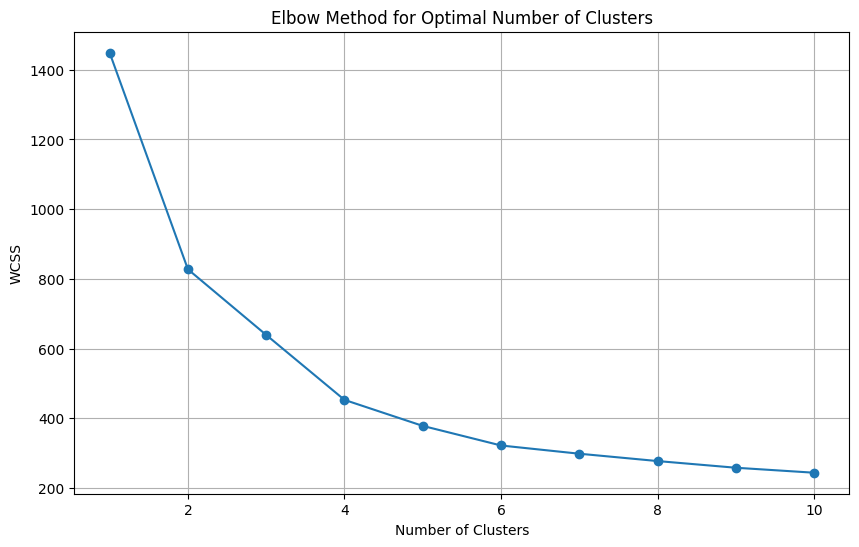

In [123]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA




# Select relevant features for clustering
features = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness']
X = data[features]

# Handle missing values by filling with the mean
X.fillna(X.mean(), inplace=True)

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Look for a point where the rate of decrease in WCSS sharply slows down. This point indicates the optimal number of clusters. In the example graph, you might observe that the WCSS decreases sharply up to a certain number of clusters and then levels off, suggesting that this point is ideal for clustering.

   Cluster  Total Cup Points
0        0         83.497800
1        1         85.542727
2        2         81.260000


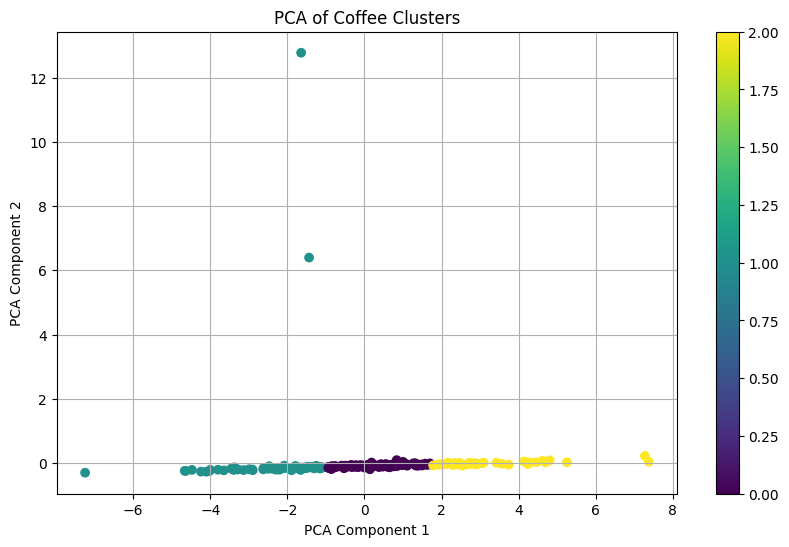

In [124]:


# Based on the Elbow Method, assume the optimal number of clusters is 3
optimal_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Evaluate clusters by analyzing average Total Cup Points
cluster_summary = data.groupby('Cluster')['Total Cup Points'].mean().reset_index()
print(cluster_summary)

# Optional: Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['PCA1'], data['PCA2'], c=data['Cluster'], cmap='viridis', label=data['Cluster'])
plt.colorbar(scatter)
plt.title('PCA of Coffee Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


Points are colored based on their cluster assignment. If clusters are well-separated in the plot, it indicates that the clustering algorithm has effectively grouped similar data points. Overlapping clusters or unclear boundaries may suggest that the number of clusters needs adjustment or that the features used for clustering need to be reconsidered.

Evaluating the perfromence of the K means model

In [126]:
from sklearn.cluster import KMeans

kmn_cluster = data.copy()
kmn_cluster.head()

Unnamed: 0  ID Country of Origin                 Farm Name  \
0           0   0          Colombia          Finca El Paraiso   
1           1   1            Taiwan  Royal Bean Geisha Estate   
2           2   2              Laos        OKLAO coffee farms   
3           3   3        Costa Rica                 La Cumbre   
4           4   4          Colombia           Finca Santuario   

                                Lot Number                           Mill  \
0                               CQU2022015               Finca El Paraiso   
1  The 2022 Pacific Rim Coffee Summit,T037       Royal Bean Geisha Estate   
2  The 2022 Pacific Rim Coffee Summit,LA01  oklao coffee processing plant   
3                               CQU2022017        La Montana Tarrazu MIll   
4                               CQU2023002                Finca Santuario   

  ICO Number                   Company   Altitude                Region  ...  \
0        NaN      Coffee Quality Union  1700-1930        Piendamo,Cauca  ...   
1        NaN  Taiwan Coffee Laboratory       1200                Chiayi  ...   
2        NaN  Taiwan Coffee Laboratory       1300  Laos Borofen Plateau  ...   
3        NaN      Coffee Quality Union       1900    Los Santos,Tarrazu  ...   
4        NaN      Coffee Quality Union  1850-2100         Popayan,Cauca  ...   

  Quakers         Color Category Two Defects            Expiration  \
0       0         green                    3  September 21st, 2023   
1       0    blue-green                    0   November 15th, 2023   
2       0     yellowish                    2   November 15th, 2023   
3       0         green                    0  September 21st, 2023   
4       2  yellow-green                    2       March 5th, 2024   

                 Certification Body  \
0             Japan Coffee Exchange   
1  Taiwan Coffee Laboratory 台灣咖啡研究室   
2  Taiwan Coffee Laboratory 台灣咖啡研究室   
3             Japan Coffee Exchange   
4             Japan Coffee Exchange   

                               Certification Address  \
0  〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...   
1  QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...   
2  QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...   
3  〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...   
4  〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...   

                     Certification Contact Cluster      PCA1      PCA2  
0  松澤　宏樹　Koju Matsuzawa - +81(0)9085642901       1 -7.245817 -0.299795  
1     Lin, Jen-An Neil 林仁安 - 886-289116612       1 -4.634007 -0.243647  
2     Lin, Jen-An Neil 林仁安 - 886-289116612       1 -4.662326 -0.242082  
3  松澤　宏樹　Koju Matsuzawa - +81(0)9085642901       1 -4.475560 -0.210804  
4  松澤　宏樹　Koju Matsuzawa - +81(0)9085642901       1 -4.239859 -0.264936  

[5 rows x 44 columns]

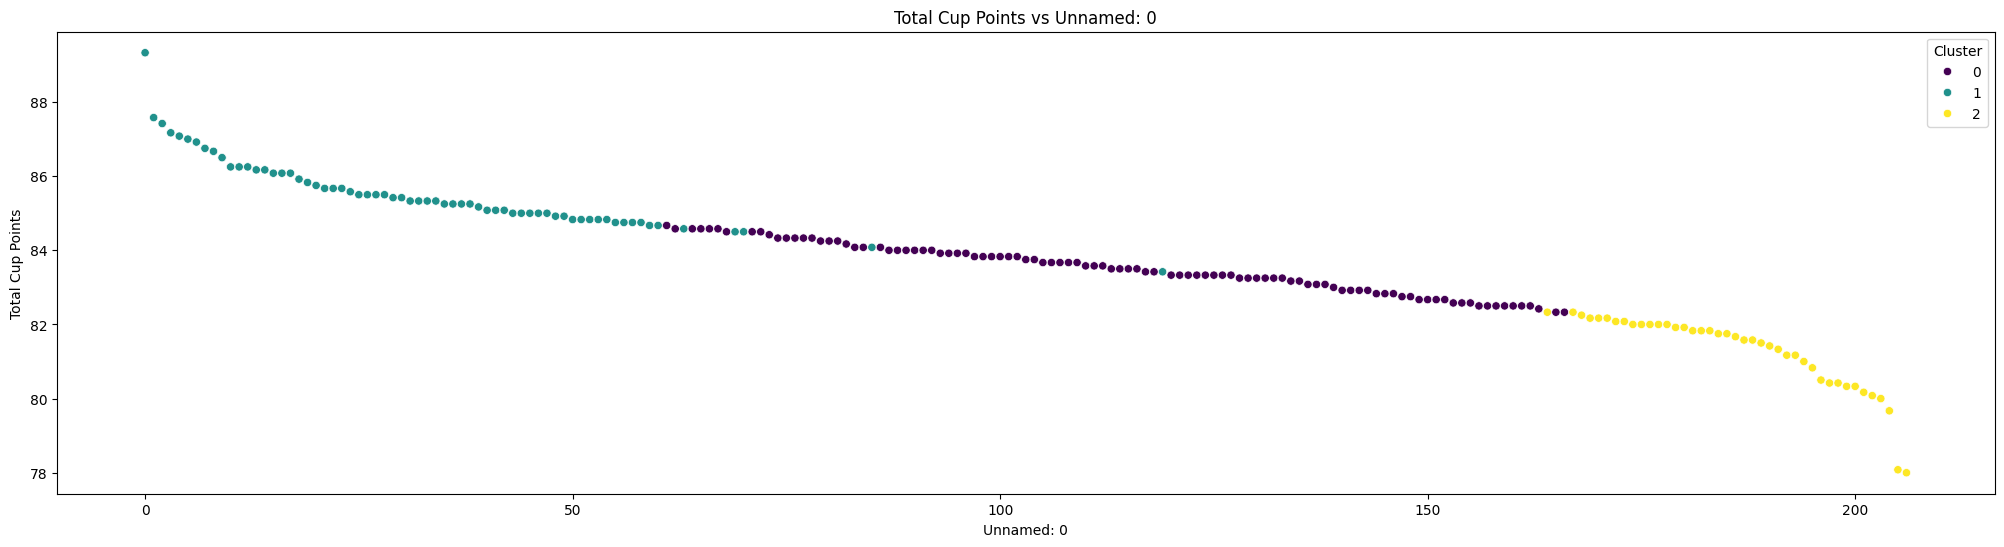

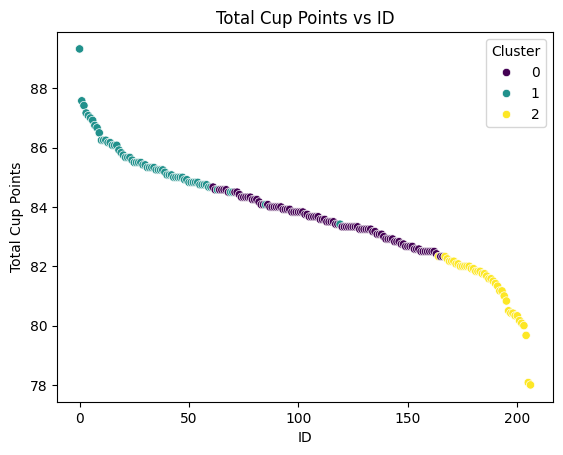

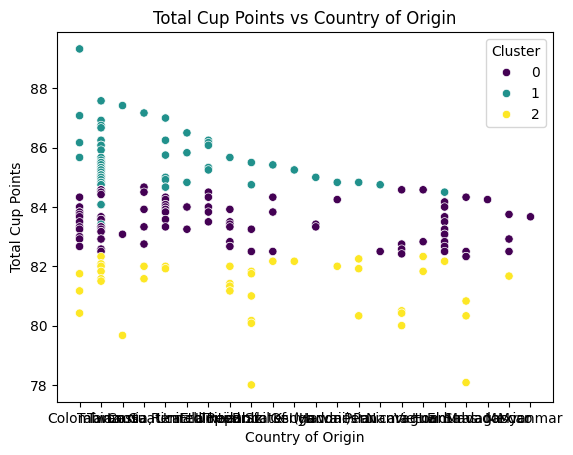

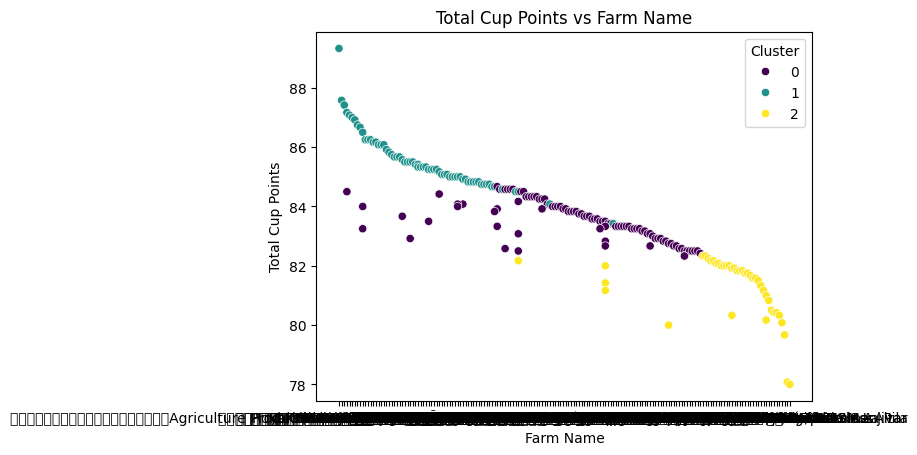

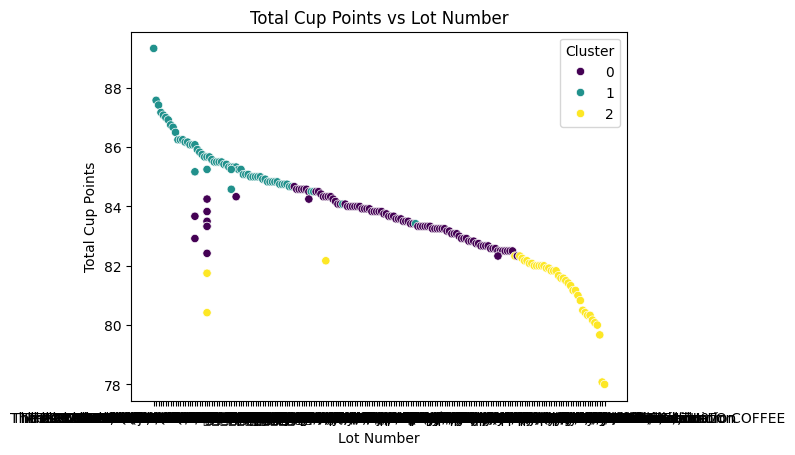

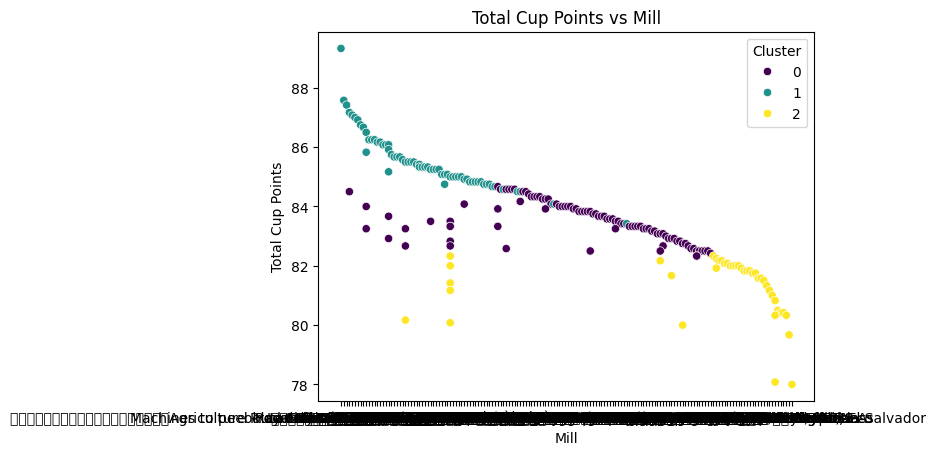

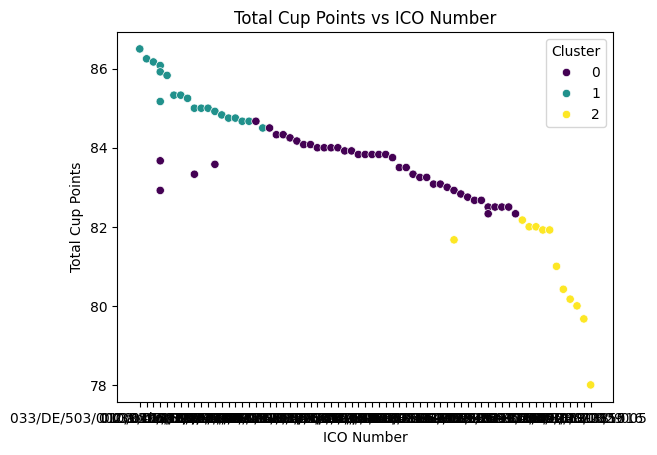

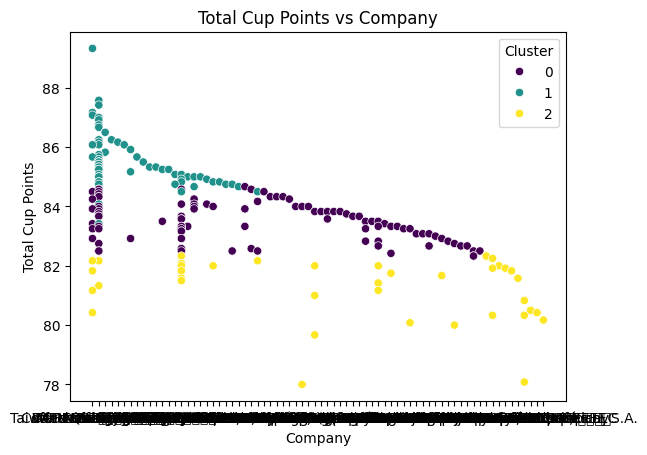

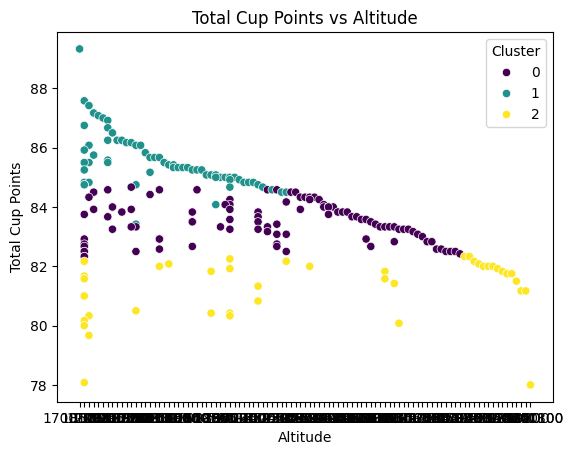

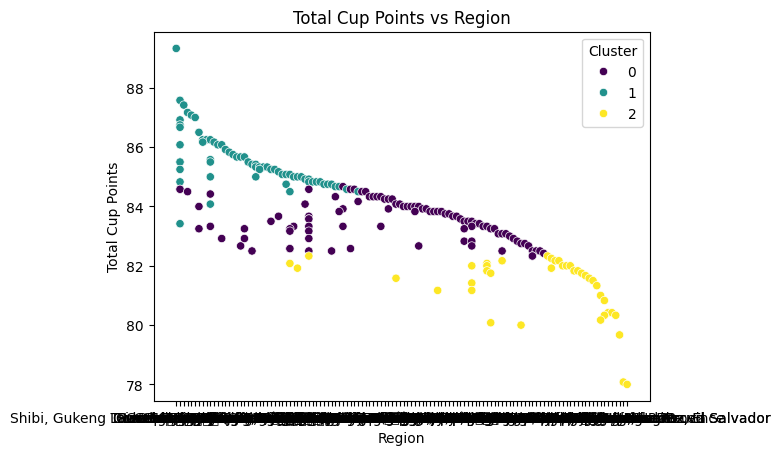

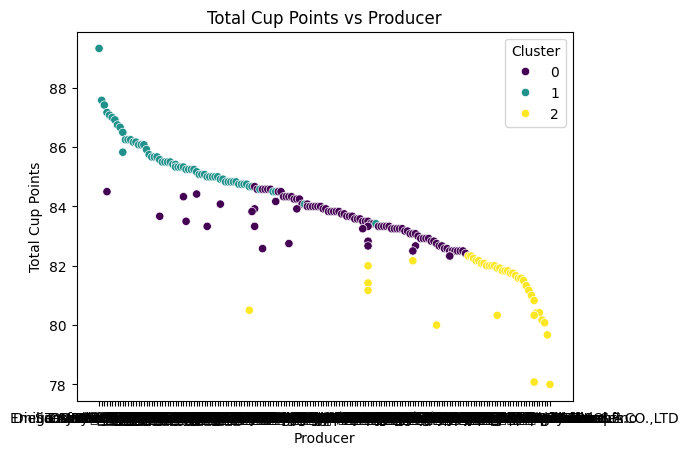

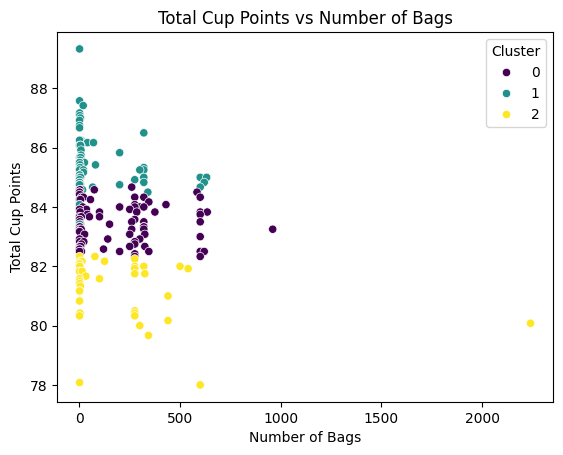

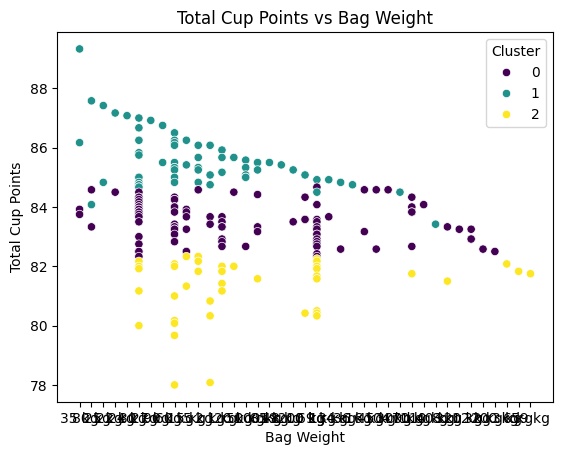

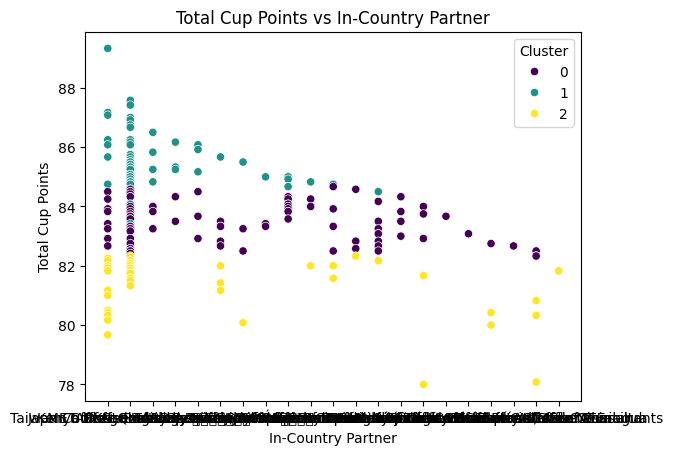

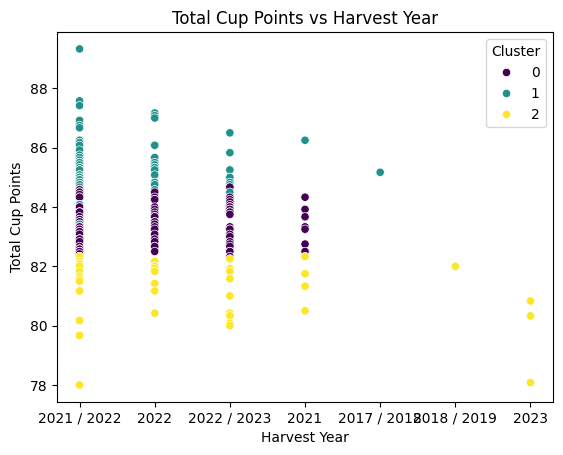

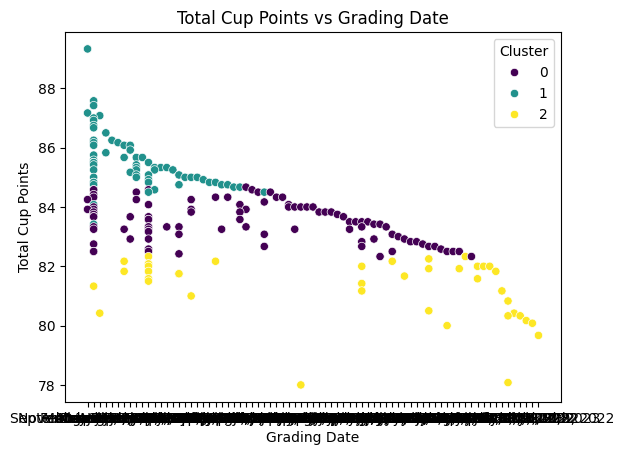

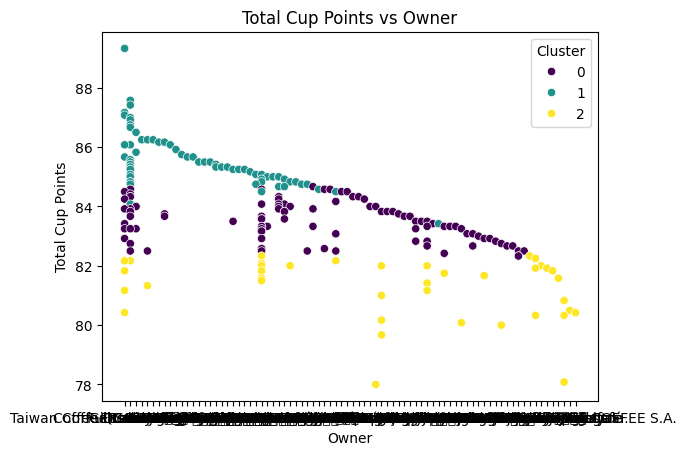

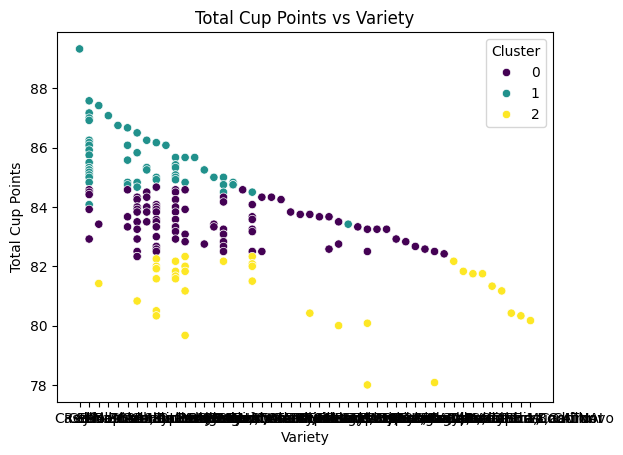

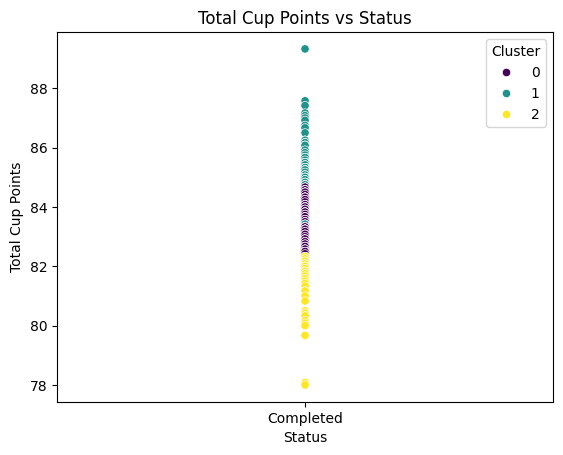

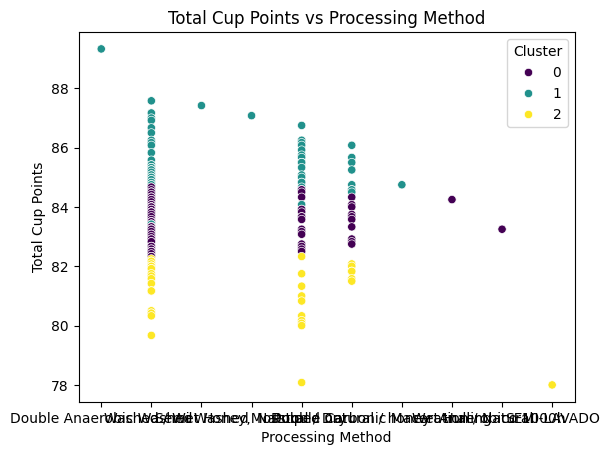

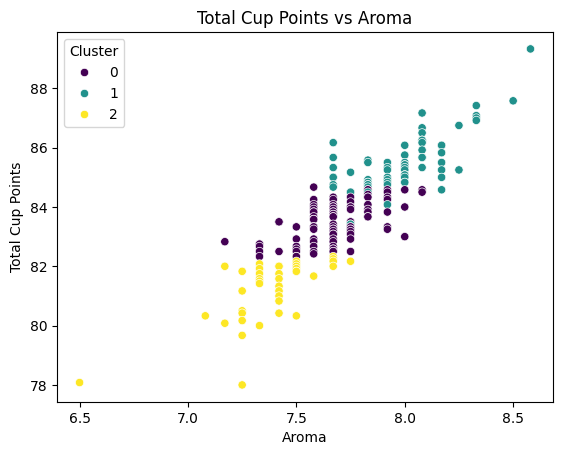

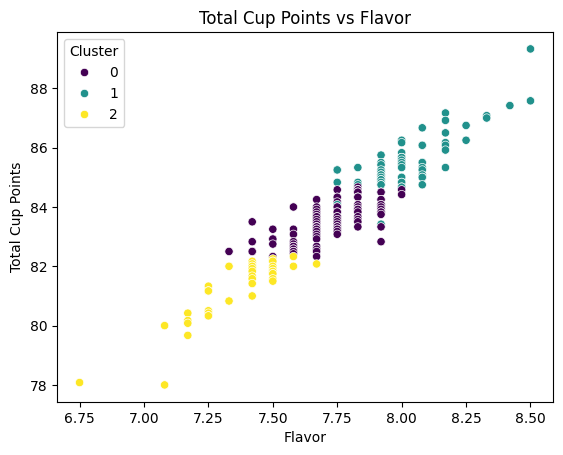

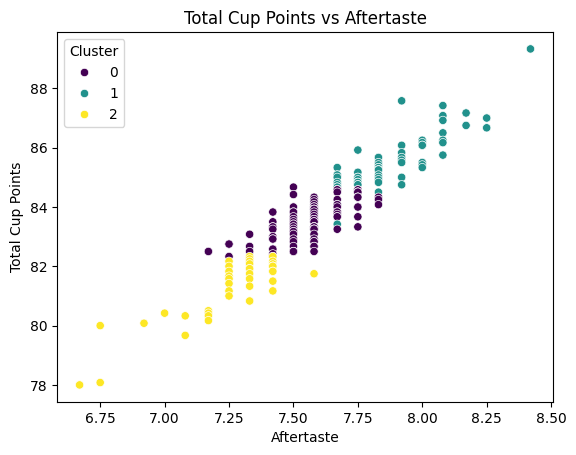

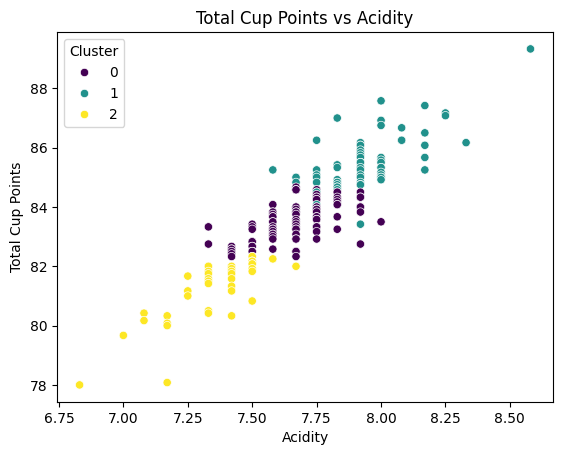

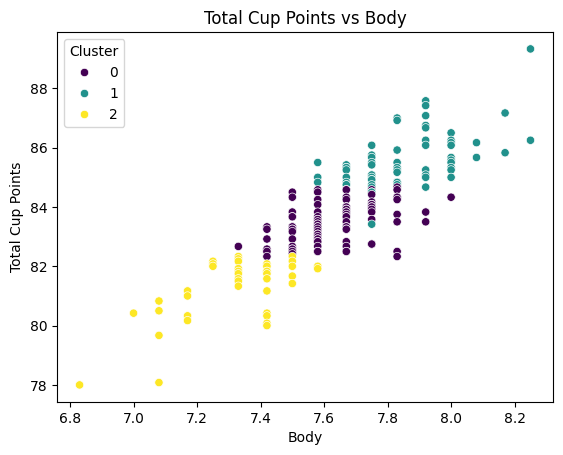

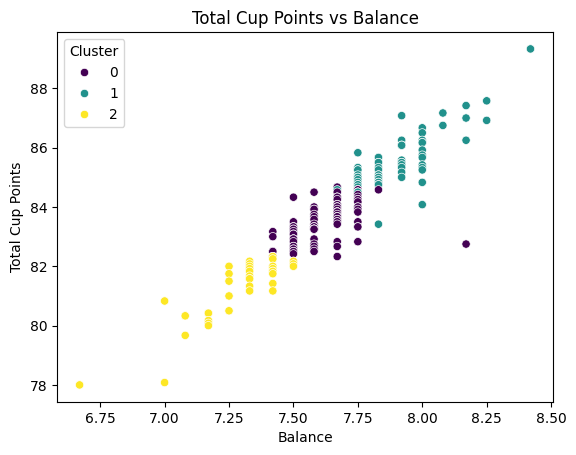

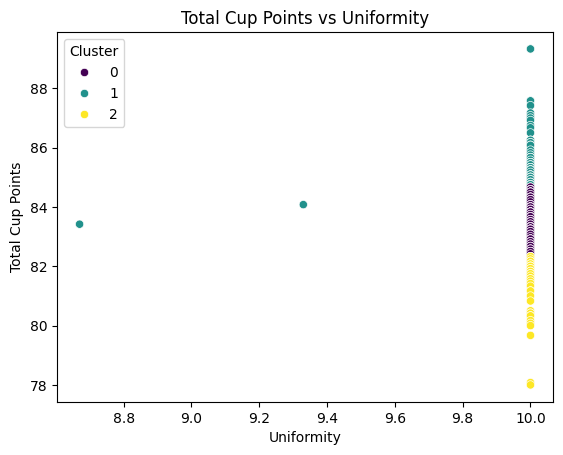

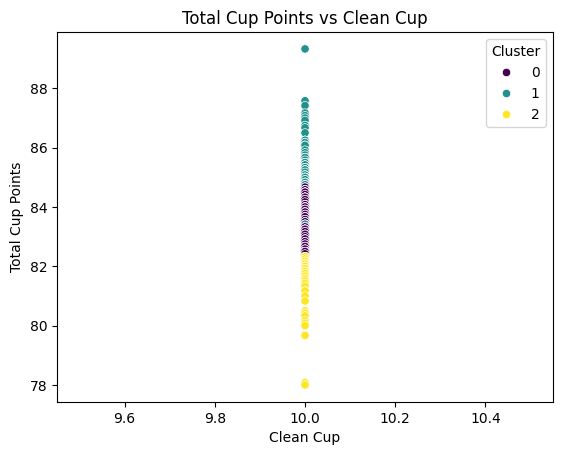

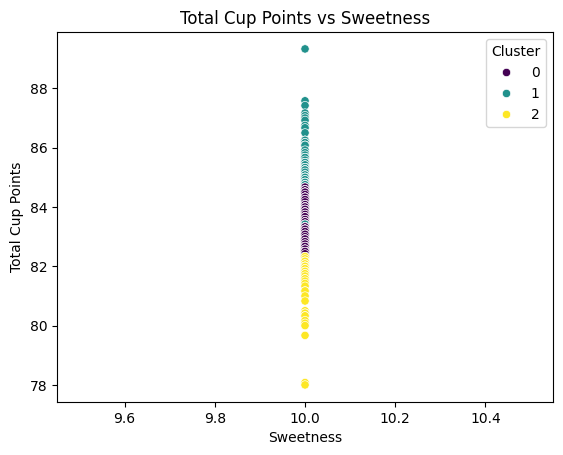

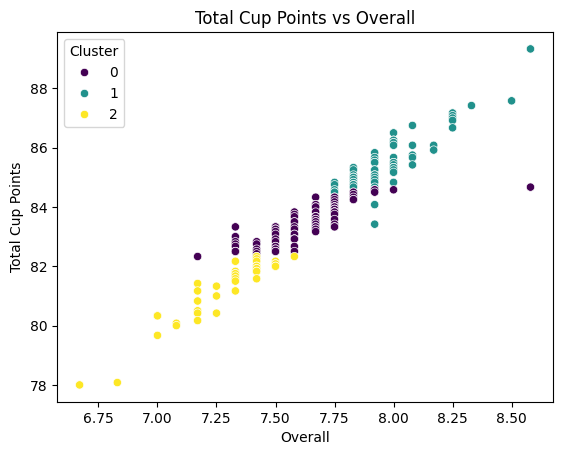

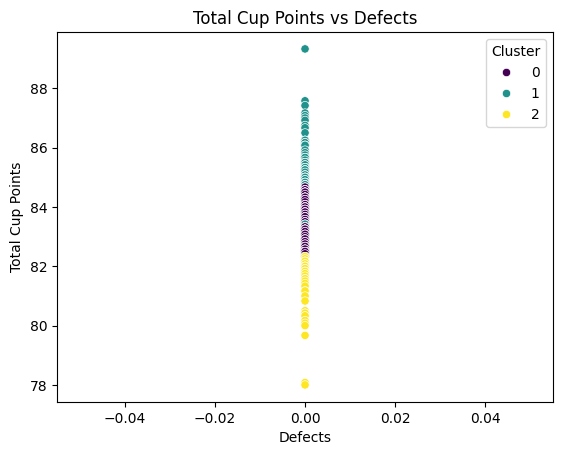

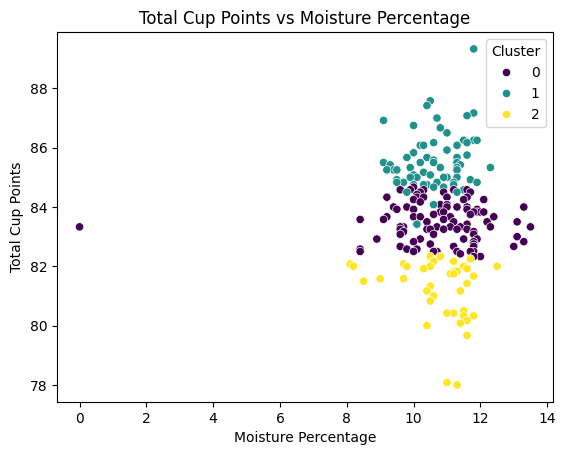

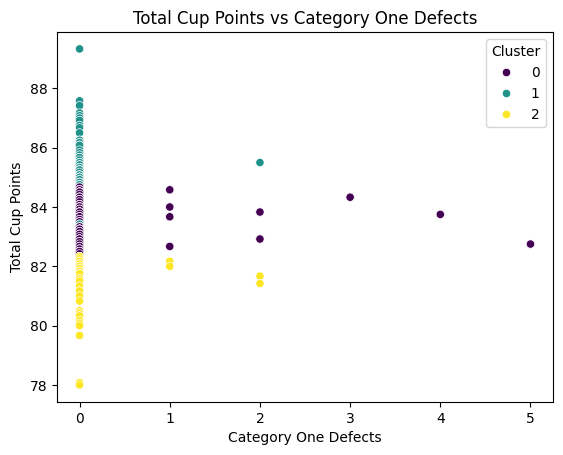

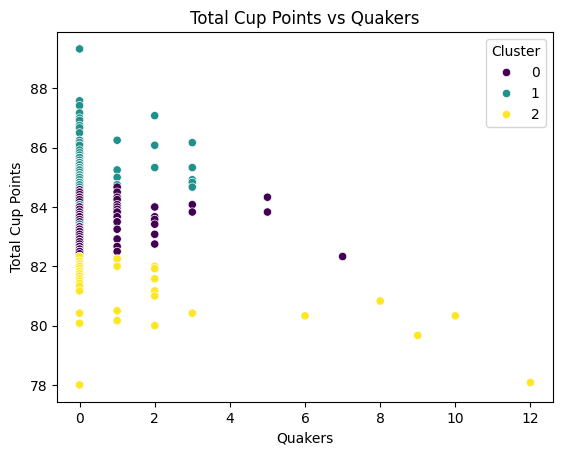

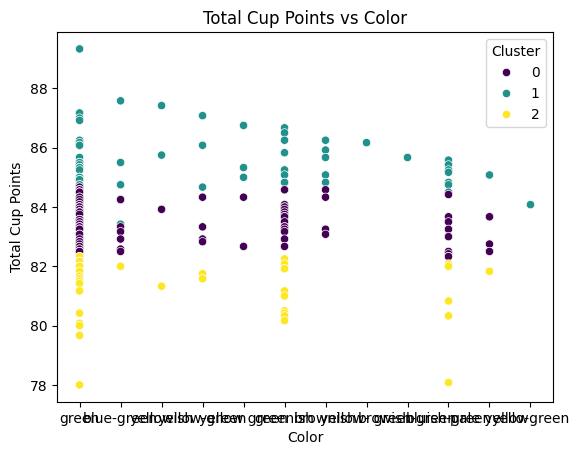

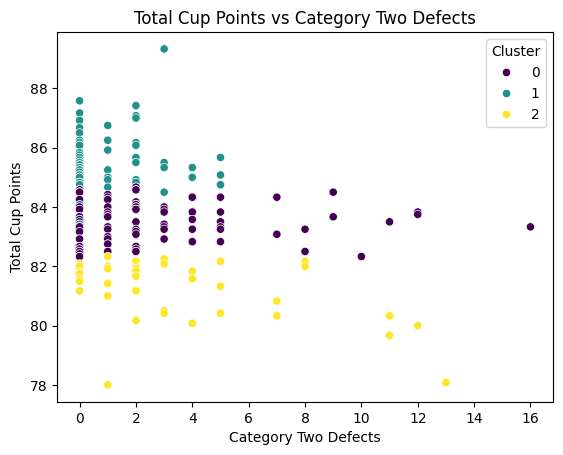

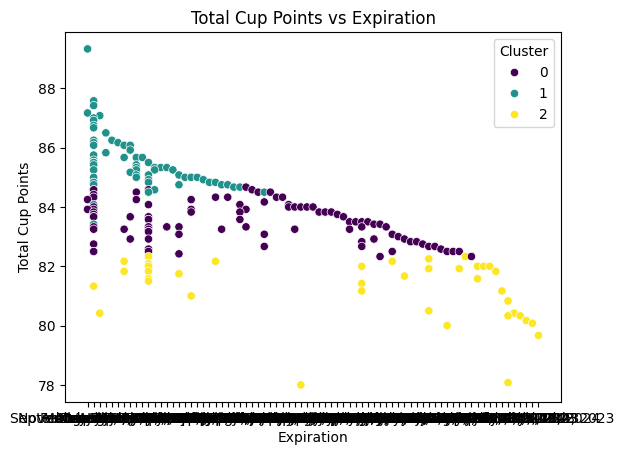

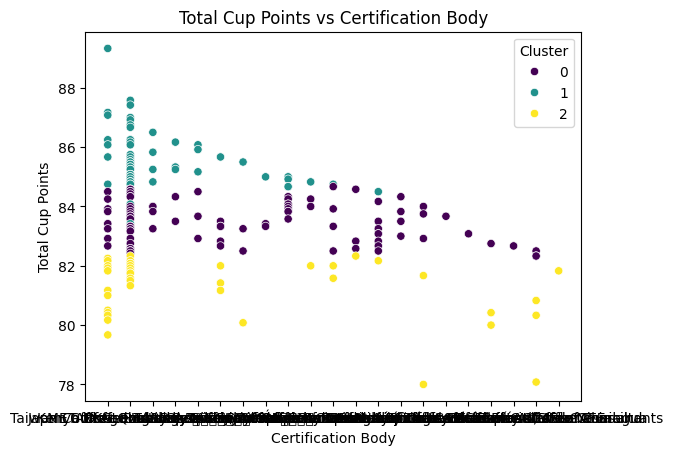

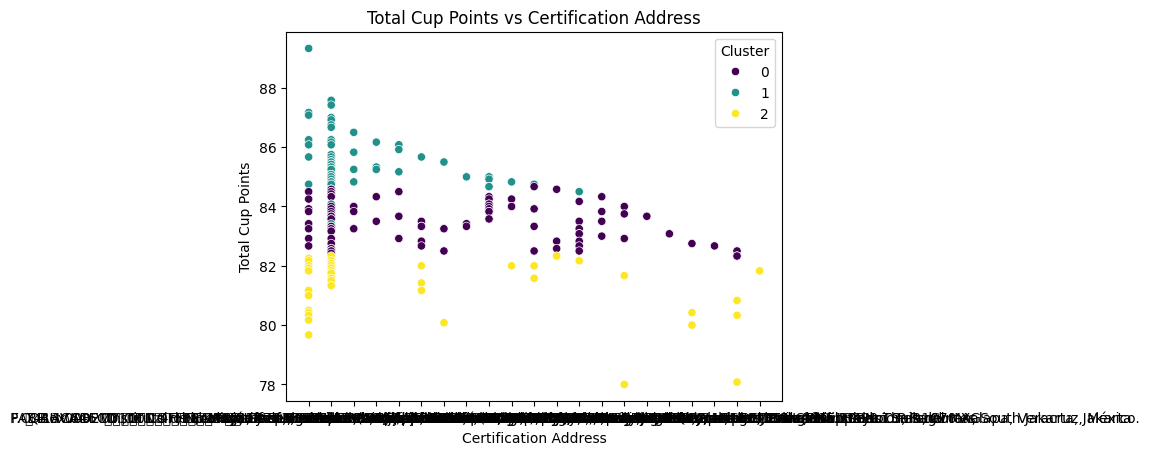

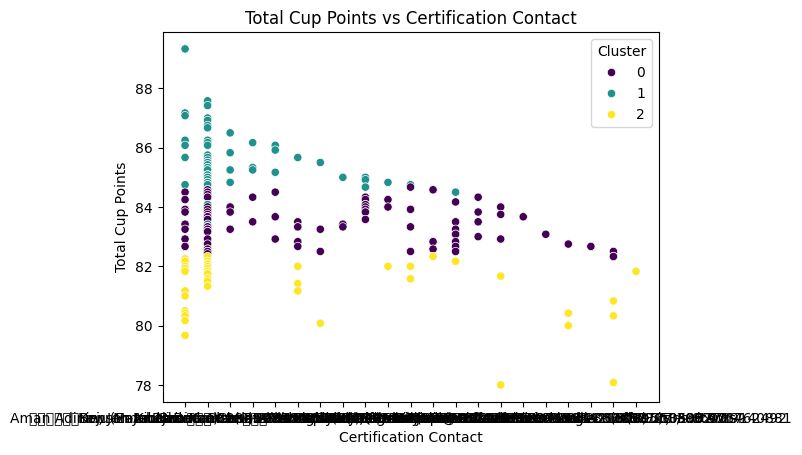

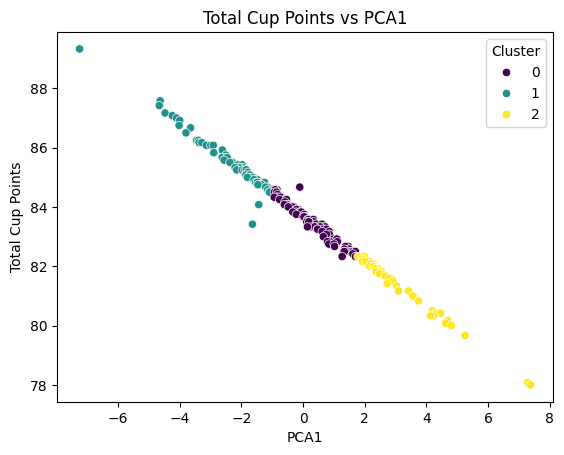

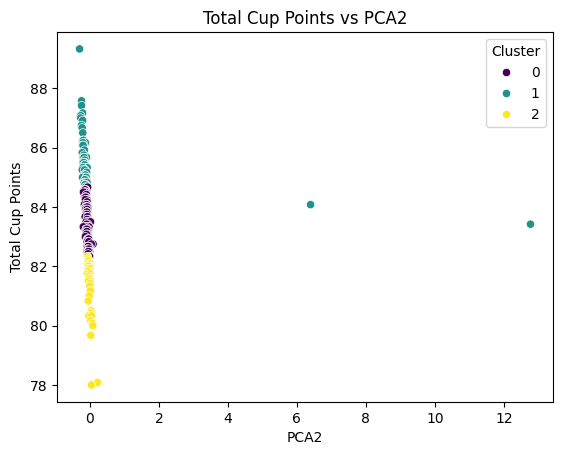

In [127]:
# visualize each variable with Total Cup Points using scatterplot with varidis

fig, ax = plt.subplots(1, 1, figsize=(25, 6))
for var in kmn_cluster.columns:
    if var != 'Cluster' and var != 'Total Cup Points':
      sns.scatterplot(data=kmn_cluster, x=var, y='Total Cup Points', hue='Cluster', palette='viridis')
      plt.title(f'Total Cup Points vs {var}')
      plt.show()
      plt.clf()
      plt.close()